# じゃんけんグリコでDQN（deep Q-network）に挑む

たかが、じゃんけん。されど、じゃんけん。[東大入試](https://mathtrain.jp/grk)に出題されたこともあれば、[某スタンド系少年マンガ](https://dic.pixiv.net/a/%E3%83%80%E3%82%A4%E3%83%A4%E3%83%A2%E3%83%B3%E3%83%89%E3%81%AF%E7%A0%95%E3%81%91%E3%81%AA%E3%81%84)では空飛ぶ熱い勝負が繰り広げられました。

ここまで言ってのけた[某ファイヤーシスターズの実戦担当](https://dic.pixiv.net/a/%E9%98%BF%E8%89%AF%E3%80%85%E6%9C%A8%E7%81%AB%E6%86%90)もいました。

>ジャンケン強ければ人生どんだけ得かって話だよ。ロシアンルーレットやってさあ？どっちが先に引き金を引くかで揉めた時、もしもジャンケン必勝法を知っていたら！

本記事では、じゃんけんから派生した遊び、じゃんけんグリコ（以下グリコ）という遊びで、DQNに勝負を挑んでみたいと思います。

## グリコとは

以下、[Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B0%E3%83%AA%E3%82%B3_%28%E9%81%8A%E3%81%B3%29)よりの引用です。

### 概要

主に屋外の階段で行われる、じゃんけんから派生した遊びのひとつ。日本の子供の遊びとして広く知られている。

### ルール

**環境**

- 階段
    - ある程度の段数を有する階段が必要となる。階段の最上と最下で最低限の意思疎通ができる程度の段数が望ましい。

- 人数
    - 2人以上。但し、じゃんけんを重ねて進行していくため、「あいこ」の発生しやすい多人数になればなるほどゲームの進行は遅くなる。

**進行**

じゃんけんを行い、勝った者が出した手に応じて進む。

- グーで勝った場合、「グリコ」と言いながら3歩進む。
- チョキで勝った場合、「チヨコレイト」と言いながら6歩進む。
- パーで勝った場合、「パイナツプル」と言いながら6歩進む。

3歩の「グリコ」で勝つよりも、6歩の「チヨコレイト」「パイナツプル」で勝ち進むほうが進行の効率が良いため、できるならばそれらの手を出して勝つことが望ましい。しかし6歩の勝ち手であるチョキとパーの両者ではチョキが勝るため、そのチョキに対抗する意味でグーの勝負にも価値がある。勝ち手に優劣を持たせることによって、じゃんけんが本来持つ駆け引きの特性が強調されている。

**勝利**

階段の頂点などの規定のゴール地点に、最初に到達した者が勝者となる。

## 数学的性質

### 性質

1. もし相手がランダムに手を出し続けるなら、自分はチョキを出し続けることで、期待値を最大化できる
1. 最適戦略は、グー：チョキ：パーを、２：２：１の割合で出すことである（ナッシュ均衡）

### 証明

**1番目の証明**

以下サイトを参照してください。ただし、チョキで勝った場合を6点に読み替えてください。

- [高校数学の美しい物語／じゃんけんグリコの最適戦略と東大の問題](https://mathtrain.jp/grk)

**2番目の証明**

[Wikipedia](https://ja.wikipedia.org/wiki/%E3%82%B0%E3%83%AA%E3%82%B3_%28%E9%81%8A%E3%81%B3%29#%E6%9C%80%E9%81%A9%E6%88%A6%E7%95%A5)を参照してください。

## DQNとは

DQN（deep Q-network）とは、機械学習の一種である強化学習（Q学習）において、Q値——ある行動から得られる報酬の見込みに比例した数値であり、行動指針となるもの——をニューラルネットワークで近似する手法となります。

というよりも、「ブロック崩し」のような往年のビデオゲームを何度も繰り返しプレーして、ルールを覚えて、コツを掴んで、攻略法まで編み出してしまうすごいやつ、といったほうが通りが良いかもしれませんね。

[![DQN Breakout](http://img.youtube.com/vi/TmPfTpjtdgg/0.jpg)](http://www.youtube.com/watch?v=TmPfTpjtdgg)

DQNの実装が「Keras-RL」というパッケージで提供されています。また、Keras-RLでプレーできるゲームが「OpenAI Gym」として提供されています。これらをインストールすることで、DQNをすぐに試してみることができます。

私の環境は[Python＋Pipenv](https://qiita.com/tanuk1647/items/cad362af79f528a5c348)ですので、仮想環境を作成し、TensorFlowとKerasをインストールしたのち、以下コマンドで、Keras-RLとOpenAI Gymをインストールしました。

```bash
$ pipenv install keras-rl
$ pipenv install gym
```


## じゃんけん戦略

DQNに勝つべく、いくつかの戦略を用意します。

**ランダム戦略**

- グー、チョキ、パーを、ランダムに出します。

**人間戦略**

- グー、チョキ、パーを、0.350：0.317：0.333の比で出します。桜美林大学の芳沢光雄教授が学生たちに11567回じゃんけんさせた結果に基づきます。

**カボチャ戦略**

- グー、グー、チョキ、パー、チョキ、パー、パー、グーの順で手を出します。元ネタは[某レトロゲーム](http://dic.nicovideo.jp/a/%E3%82%B5%E3%83%A9%E3%83%80%E3%81%AE%E5%9B%BD%E3%81%AE%E3%83%88%E3%83%9E%E3%83%88%E5%A7%AB)です。

**期待値最大化戦略**

- ひたすらチョキを出し続けます。先述の数学的性質1参照。

**ナッシュ均衡戦略**

- グー、チョキ、パーを、0.4：0.4：0.2の比で出します。先述の数学的性質2参照。

**記憶戦略**

- 基本的に人間戦略と同じですが、相手の手を記憶し、2連続で同じ手を出してきたときは、その手を負かすような手を出します。より人間を模したつもりです。

**多数決戦略**

- 以上の全戦略で多数決をとって手を出します。


## グリコのゲーム化

抽象クラス[gym.Env](https://github.com/openai/gym/blob/master/gym/core.py)を継承のうえ、必須項目を実装していきます。具体的な実装内容は、後述のソースコードを参照してください。なお、階段は100段、人数は2人としました。

**action_space**

- 行動空間。プレーヤーの行動の選択肢の数だけ「幅」を持つ。

**observation_space**

- 観測空間。プレーヤーが観測可能な2次元の「広さ」と、その取りうる値の「高さ」を持つ。

**step**

- ゲームを1ステップ進める。

**reset**

- ゲームの状態をリセットする。

**render**

- 画面をレンダリングする。


## DQNの構築

Keras-RLは、Kerasと同レベルに抽象化されているので、シンプルに書けます。モデルの初期化、訓練、テストについて書きました。具体的な実装内容は、後述のソースコードを参照してください。

モデルの初期化については、Kerasでニューラルネットワークを作成したのち、DQNのエージェントを作成し、コンパイルします。ネットワークは中間層が1層のみとしました。ユニット数は128。活性化関数はランプ関数を用いました。DQNのポリシーとしては、ボルツマン選択（BoltzmannQPolicy）を指定しました。Q値に基づいた確率的行動をとるはずです。

訓練やテストについては、DQNのfitメソッド、testメソッドを呼び出すのみです。その際、作ったゲーム（環境）を渡してやります。訓練の際は、Q値の収束状況を可視化するために、ロガーを仕込んだりもします。fitの戻り値のhistoryにQ値が含まれないので…。

その他、ハイパーパラメータは、動かしながら調整しました。

**「DQNに挑む」というのが今回の記事の構図ですが、フェアに設定したつもりです。**

## ソースコード

以下、ソースコードです。長いので、ご興味のある方以外は、スクロールして飛ばしてください。

In [1]:
import sys
from os import mkdir
from os.path import exists
from sys import exc_info
import numpy as np
from enum import Enum, IntEnum, auto
from collections import Counter
from functools import reduce
import gym
from gym import spaces
from gym.utils import seeding
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam
from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory
from rl.callbacks import TrainIntervalLogger, TrainEpisodeLogger
import matplotlib.pyplot as plt


class Hand(IntEnum):
    GOO = 0
    CHOKI = 1
    PAH = 2


class Strategy(Enum):
    RANDOM = auto()
    HUMAN = auto()
    PUMPKIN = auto()
    MAXIMUM = auto()
    NASH = auto()
    MEMORY = auto()
    MAJORITY = auto()


class RandomStrategy:
    hands = [Hand.GOO, Hand.CHOKI, Hand.PAH]
    
    def __init__(self, np_random):
        self.np_random = np_random
    
    def get_hand(self, user_hand):
        return self.np_random.choice(RandomStrategy.hands)
    
    def reset(self):
        pass


class HumanStrategy:
    # 芳沢光雄(2009)『ジャンケンに関する研究結果』による
    ratio = [0.350, 0.317, 0.333]
    hands = [Hand.GOO, Hand.CHOKI, Hand.PAH]
    
    def __init__(self, np_random):
        self.np_random = np_random
    
    def get_hand(self, user_hand):
        return self.np_random.choice(HumanStrategy.hands, p=HumanStrategy.ratio)
    
    def reset(self):
        pass


class PumpkinStrategy:
    strategy = [Hand.GOO, Hand.GOO, Hand.CHOKI, Hand.PAH,
                Hand.CHOKI, Hand.PAH, Hand.PAH, Hand.GOO]
    
    def __init__(self, np_random):
        self.np_random = np_random
        self.step = 0
    
    def get_hand(self, user_hand):
        hand = PumpkinStrategy.strategy[self.step % 8]
        self.step += 1
        return hand
    
    def reset(self):
        self.step = 0


class MaximumStrategy:
    def __init__(self, np_random):
        self.np_random = np_random
    
    def get_hand(self, user_hand):
        return Hand.CHOKI
    
    def reset(self):
        pass


class NashStrategy:
    ratio = [0.4, 0.4, 0.2]
    hands = [Hand.GOO, Hand.CHOKI, Hand.PAH]
    
    def __init__(self, np_random):
        self.np_random = np_random
    
    def get_hand(self, user_hand):
        return self.np_random.choice(NashStrategy.hands, p=NashStrategy.ratio)
    
    def reset(self):
        pass


class MemoryStrategy:
    # 芳沢光雄(2009)『ジャンケンに関する研究結果』による
    ratio = [0.350, 0.317, 0.333]
    hands = [Hand.GOO, Hand.CHOKI, Hand.PAH]
    
    def __init__(self, np_random):
        self.np_random = np_random
        self.hand = self.np_random.choice(HumanStrategy.hands, p=HumanStrategy.ratio)
        self.memory = []
    
    def get_hand(self, user_hand):
        self.memory += [user_hand]
        if len(self.memory) >= 2:
            memory = self.memory[-2:]
            if reduce(lambda x, y: x==y, memory):
                if memory[-1] == Hand.GOO:
                    self.hand = Hand.PAH
                elif memory[-1] == Hand.CHOKI:
                    self.hand = Hand.GOO
                elif memory[-1] == Hand.PAH:
                    self.hand = Hand.CHOKI
            else:
                self.hand = self.np_random.choice(MemoryStrategy.hands, p=MemoryStrategy.ratio)
        
        return self.hand
    
    def reset(self):
        self.memory = []


class MajorityStrategy:
    hands = [Hand.GOO, Hand.CHOKI, Hand.PAH]
    
    def __init__(self, np_random):
        self.np_random = np_random
        self.strategies = []
        self.strategies += [RandomStrategy(self.np_random)]
        self.strategies += [HumanStrategy(self.np_random)]
        self.strategies += [PumpkinStrategy(self.np_random)]
        self.strategies += [MaximumStrategy(self.np_random)]
        self.strategies += [NashStrategy(self.np_random)]
        self.strategies += [MemoryStrategy(self.np_random)]
        
    def get_hand(self, user_hand):
        while True:
            hands = [s.get_hand(user_hand) for s in self.strategies]
            most_common = Counter(hands).most_common()
            if len(most_common) == 1:
                break
            if most_common[0][1] == most_common[1][1]:
                continue
            break
        return most_common[0][0]
    
    def reset(self):
        pass


class JankenGlico(gym.Env):
    metadata = {
        'render.modes': ['human', 'ansi']
    }
    
    action_space = spaces.Discrete(3)
    reward_range = [0, 1]
    observation_space = spaces.Box(low=0, high=100, shape=(4,), dtype='float32')
    
    def __init__(self, strategy=Strategy.HUMAN, goal=100):
        super().__init__()
        
        self.seed()
        
        self.strategy = None
        if strategy == Strategy.RANDOM:
            self.strategy = RandomStrategy(self.np_random)
        elif strategy == Strategy.HUMAN:
            self.strategy = HumanStrategy(self.np_random)
        elif strategy == Strategy.PUMPKIN:
            self.strategy = PumpkinStrategy(self.np_random)
        elif strategy == Strategy.MAXIMUM:
            self.strategy = MaximumStrategy(self.np_random)
        elif strategy == Strategy.NASH:
            self.strategy = NashStrategy(self.np_random)
        elif strategy == Strategy.MAJORITY:
            self.strategy = MajorityStrategy(self.np_random)
        elif strategy == Strategy.MEMORY:
            self.strategy = MemoryStrategy(self.np_random)
        
        self.goal = goal
        self.user_hands = []
        self.enemy_hands = []
        self.reset()
    
    def reset(self):
        self.user_position = 0
        self.enemy_position  = 0
        self.user_hand = Hand.GOO   # 最初はグー
        self.user_positions = [self.user_position]
        self.enemy_hand = Hand.GOO  # 最初はグー
        self.enemy_positions = [self.enemy_position]
        self.strategy.reset()
        self.done = False
        observation = [self.user_position, self.enemy_position, self.user_hand, self.enemy_hand]
        return observation
    
    def seed(self, seed=None):
        self.np_random, seed = seeding.np_random(seed)
        return [seed]
    
    def step(self, action):
        self.enemy_hand = self.strategy.get_hand(self.user_hand)
        self.enemy_hands += [self.enemy_hand]
        self.user_hand = Hand(action)
        self.user_hands += [self.user_hand]
        
        # あいこの場合
        if self.user_hand == self.enemy_hand:
            observation = [self.user_position, self.enemy_position, self.user_hand, self.enemy_hand]
            reward = 0
            self.done = False
        
        # プレーヤーが勝つ場合
        elif self.user_hand == Hand.GOO and self.enemy_hand == Hand.CHOKI:
            self.user_position += 3
            observation = [self.user_position, self.enemy_position, self.user_hand, self.enemy_hand]
            if self.user_position >= 100:
                reward = 1000
                self.done = True
            else:
                reward = 0
                self.done = False
        
        elif self.user_hand == Hand.CHOKI and self.enemy_hand == Hand.PAH:
            self.user_position += 6
            observation = [self.user_position, self.enemy_position, self.user_hand, self.enemy_hand]
            if self.user_position >= 100:
                reward = 1000
                self.done = True
            else:
                reward = 0
                self.done = False
        
        elif self.user_hand == Hand.PAH and self.enemy_hand == Hand.GOO:
            self.user_position += 6
            observation = [self.user_position, self.enemy_position, self.user_hand, self.enemy_hand]
            if self.user_position >= 100:
                reward = 1000
                self.done = True
            else:
                reward = 0
                self.done = False
        
        # 敵が勝つ場合
        elif self.user_hand == Hand.GOO and self.enemy_hand == Hand.PAH:
            self.enemy_position += 6
            observation = [self.user_position, self.enemy_position, self.user_hand, self.enemy_hand]
            if self.enemy_position >= 100:
                reward = 0
                self.done = True
            else:
                reward = 0
                self.done = False
        
        elif self.user_hand == Hand.CHOKI and self.enemy_hand == Hand.GOO:
            self.enemy_position += 3
            observation = [self.user_position, self.enemy_position, self.user_hand, self.enemy_hand]
            if self.enemy_position >= 100:
                reward = 0
                self.done = True
            else:
                reward = 0
                self.done = False
        
        elif self.user_hand == Hand.PAH and self.enemy_hand == Hand.CHOKI:
            self.enemy_position += 6
            observation = [self.user_position, self.enemy_position, self.user_hand, self.enemy_hand]
            if self.enemy_position >= 100:
                reward = 0
                self.done = True
            else:
                reward = 0
                self.done = False
        
        self.user_positions += [self.user_position]
        self.enemy_positions += [self.enemy_position]
        
        return observation, reward, self.done, {}
    
    def e2s(self, e):
        if e == Hand.GOO:
            s = 'グー'
        elif e == Hand.CHOKI:
            s = 'チョキ'
        elif e == Hand.PAH:
            s = 'パー'
        return s
    
    def render(self, mode='human', close=False):
        if mode == 'ansi':
            outfile = StringIO()
        elif mode == 'human':
            outfile = sys.stdout
        else:
            # just raise an exception
            super().render(mode=mode)
            
        strs = [i for i in range(5)]
        strs[0] = '\n'
        strs[1] = 'プレーヤーの手：' + self.e2s(self.user_hand) + '、'
        strs[2] = '敵の手：' + self.e2s(self.enemy_hand) + '\n'
        strs[3] = 'プレーヤーの位置：' + str(self.user_position) + '、'
        strs[4] = '敵の位置：' + str(self.enemy_position) + '\n'
        outfile.write(''.join(strs))
        return outfile
        
    def close(self):
        # just return
        super().close()
    
    def play(self):
        self.reset()
        while not self.done:
            print('')
            print('じゃーんけーん')
            self.step(self.__input())
            self.render()
        print('また遊ぼうね！')
    
    def __input(self):
        while True:
            print('[グー：0、チョキ：1、パー：2]')
            i = input()
            if i in ['0', '1', '2']:
                break
        return int(i)

class TrainIntervalLogger2(TrainIntervalLogger):
    def __init__(self, interval=10000):
        super().__init__(interval=interval)
        self.records = {}
    
    def on_train_begin(self, logs):
        super().on_train_begin(logs)
        self.records['interval'] = []
        self.records['episode_reward'] = []
        for metrics_name in self.metrics_names:
            self.records[metrics_name] = []
    
    def on_step_begin(self, step, logs):
        if self.step % self.interval == 0:
            if len(self.episode_rewards) > 0:
                self.records['interval'].append(self.step // self.interval)
                self.records['episode_reward'].append(np.mean(self.episode_rewards))
                metrics = np.array(self.metrics)
                assert metrics.shape == (self.interval, len(self.metrics_names))
                if not np.isnan(metrics).all():  # not all values are means
                    means = np.nanmean(self.metrics, axis=0)
                    assert means.shape == (len(self.metrics_names),)
                    for name, mean in zip(self.metrics_names, means):
                        self.records[name].append(mean)
        super().on_step_begin(step, logs)


class DQNJankenGlico:
    # 重み保存先
    weightdir = './data'
    weightfile = './data/dqn_{}_{}_weights.h5'
    
    # モデルの初期化
    def __init__(self, strategy=Strategy.HUMAN, recycle=True):
        print('モデルを作成します。')
        self.train_interval_logger = None
        
        # Get the environment and extract the number of actions.
        self.env = JankenGlico(strategy=strategy)
        self.env_name = 'janken_glico'
        self.weightfile = DQNJankenGlico.weightfile.format(self.env_name, str(strategy))
        self.nb_actions = self.env.action_space.n
        
        # Next, we build a very simple model.
        self.model = Sequential()
        self.model.add(Flatten(input_shape=(1,) + self.env.observation_space.shape))
        self.model.add(Dense(128))
        self.model.add(Activation('relu'))
        self.model.add(Dense(self.nb_actions))
        self.model.add(Activation('linear'))
        #print(self.model.summary())
        
        # Finally, we configure and compile our agent.
        # You can use every built-in Keras optimizer and even the metrics!
        memory = SequentialMemory(limit=50000, window_length=1)
        policy = BoltzmannQPolicy(tau=1.)
        self.dqn = DQNAgent(model=self.model, nb_actions=self.nb_actions, memory=memory,
                            nb_steps_warmup=1000, target_model_update=1e-2, policy=policy)
        self.dqn.compile(Adam(lr=1e-3), metrics=[])
        
        self.__istrained = False
        print('モデルを作成しました。')
        
        if recycle:
            if exists(self.weightfile):
                try:
                    print('訓練済み重みを読み込みます。')
                    self.dqn.load_weights(self.weightfile)
                    self.__istrained = True
                    print('訓練済み重みを読み込みました。')
                    return None
                except:
                    print('訓練済み重みの読み込み中にエラーが発生しました。')
                    print('Unexpected error:', exc_info()[0])
                    raise
            else:
                print('訓練済み重みが存在しません。訓練を行ってください。')
    
    # 訓練
    def train(self, nb_steps=30000, verbose=1, visualize=False, log_interval=3000):
        if self.__istrained:
            raise RuntimeError('このモデルは既に訓練済みです。')
        
        print('訓練を行うので、お待ちください。')
        
        # 訓練実施
        # Okay, now it's time to learn something!
        # We visualize the training here for show, but this slows down training quite a lot.
        # You can always safely abort the training prematurely using Ctrl + C.
        callbacks = []
        if verbose == 1:
            self.train_interval_logger = TrainIntervalLogger2(interval=log_interval)
            callbacks.append(self.train_interval_logger)
            verbose = 0
        elif verbose > 1:
            callbacks.append(TrainEpisodeLogger())
            verbose = 0
        
        hist = self.dqn.fit(self.env, nb_steps=nb_steps,
                            callbacks=callbacks, verbose=verbose,
                            visualize=visualize, log_interval=log_interval)
        self.__istrained = True
        
        if self.train_interval_logger is not None:
            # 訓練状況の可視化
            interval = self.train_interval_logger.records['interval']
            episode_reward = self.train_interval_logger.records['episode_reward']
            mean_q = self.train_interval_logger.records['mean_q']
            if len(interval) > len(mean_q):
                mean_q = np.pad(mean_q, [len(interval) - len(mean_q), 0], "constant")
            plt.figure()
            plt.plot(interval, episode_reward, marker='.', label='報酬')
            plt.plot(interval, mean_q, marker='.', label='Q値')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('interval')
            plt.ylabel('score')
            plt.xticks(np.arange(min(interval),
                                 max(interval) + 1,
                                 (max(interval) - min(interval))//7))
            plt.show()
        
        # 重みの保存
        if not exists(DQNJankenGlico.weightdir):
            try:
                mkdir(DQNJankenGlico.weightdir)
            except:
                print('重み保存フォルダの作成中にエラーが発生しました。')
                print('Unexpected error:', exc_info()[0])
                raise
        try:
            # After training is done, we save the final weights.
            self.dqn.save_weights(self.weightfile, overwrite=True)
        except:
            print('重みの保存中にエラーが発生しました。')
            print('Unexpected error:', exc_info()[0])
            raise
        
        return hist
    
    # テスト
    def test(self, nb_episodes=10, visualize=True, verbose=1):
        # Finally, evaluate our algorithm for 5 episodes.
        hist = self.dqn.test(self.env, nb_episodes=nb_episodes,
                             verbose=verbose, visualize=visualize)
        return hist


def visualize_hands(env):
    c = Counter(env.user_hands)
    plt.figure()
    x = np.array([c[Hand.GOO], c[Hand.CHOKI], c[Hand.PAH]])
    label = ['グー', 'チョキ', 'パー']
    plt.pie(x, labels=label, counterclock=False, startangle=90, labeldistance=0.8, autopct="%1.1f%%")
    plt.axis('equal')
    plt.title('プレーヤーの手')
    
    c = Counter(env.enemy_hands)
    plt.figure()
    x = np.array([c[Hand.GOO], c[Hand.CHOKI], c[Hand.PAH]])
    label = ['グー', 'チョキ', 'パー']
    plt.pie(x, labels=label, counterclock=False, startangle=90, labeldistance=0.8, autopct="%1.1f%%")
    plt.axis('equal')
    plt.title('敵の手')


def visualize_positions(env):
    plt.figure()
    x = range(1, len(env.user_positions) + 1)
    u = env.user_positions
    e = env.enemy_positions
    plt.plot(x, u, marker='.', label='プレーヤーの位置')
    plt.plot(x, e, marker='.', label='敵の位置')
    plt.legend(loc='best', fontsize=10)
    plt.grid()
    plt.xlabel('steps')
    plt.ylabel('position')
    plt.show()

Using TensorFlow backend.


人間がプレーすることもできます。おまけ機能のようなものです。

In [2]:
#env = JankenGlico(strategy=Strategy.RANDOM)
#env.play()
#visualize_positions(env)
#visualize_hands(env)

## 一回戦：ランダム戦略 vs DQN

ランダム戦略は、グー、チョキ、パーを、ランダムに出します。

まずは、モデルの訓練です。

モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 40000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 4s 2ms/step - reward: 8.0000
42 episodes - episode_reward: 380.952 [0.000, 1000.000] - loss: 2558.612 - mean_q: 47.748

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 5s 3ms/step - reward: 11.5000
42 episodes - episode_reward: 547.619 [0.000, 1000.000] - loss: 2005.667 - mean_q: 172.962

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 5s 3ms/step - reward: 12.5000
36 episodes - episode_reward: 694.444 [0.000, 1000.000] - loss: 1921.002 - mean_q: 369.180

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 5s 3ms/step - reward: 13.5000
38 episodes - episode_reward: 710.526 [0.000, 1000.000] - loss: 2960.158 - mean_q: 554.310

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 5s 3ms/step - reward: 7.0000
36 episodes - episode_re

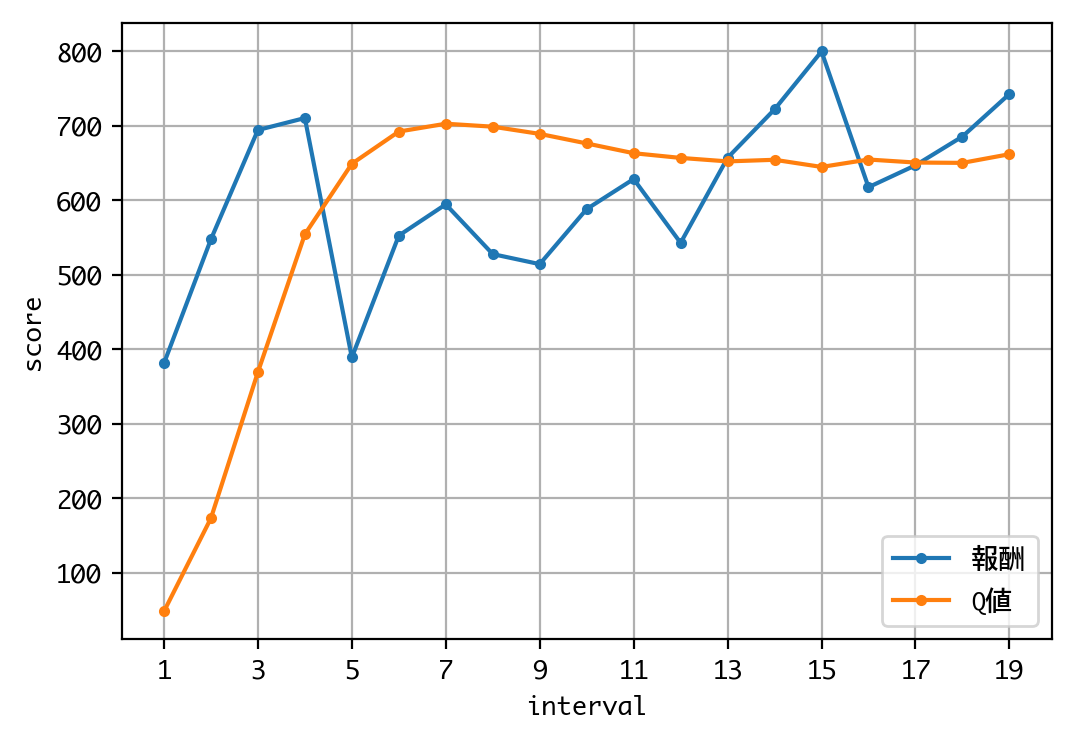

In [3]:
d = DQNJankenGlico(strategy=Strategy.RANDOM, recycle=False)
h = d.train(nb_steps=40000, log_interval=2000, verbose=1)

Q値を見る限り、学習は収束しているようですね。

それでは、ひと勝負しましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
Testing for 1 episodes ...

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：0、敵の位置：3

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：0、敵の位置：6

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：6、敵の位置：6

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：6、敵の位置：6

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：6、敵の位置：6

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：6、敵の位置：6

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：6、敵の位置：9

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：6、敵の位置：12

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：6、敵の位置：12

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：12、敵の位置：12

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：12、敵の位置：12

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：12、敵の位置：15

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：12、敵の位置：18

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：18、敵の位置：18

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：18、敵の位置：18

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：18、敵の位置：21

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：18、敵の位置：21

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：24、敵の位置：21

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：30、敵の位置：21

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：36、敵の位置：21

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：36、敵の位置：21

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：42、敵の位置：21

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：42、敵の位置：21

プレーヤー

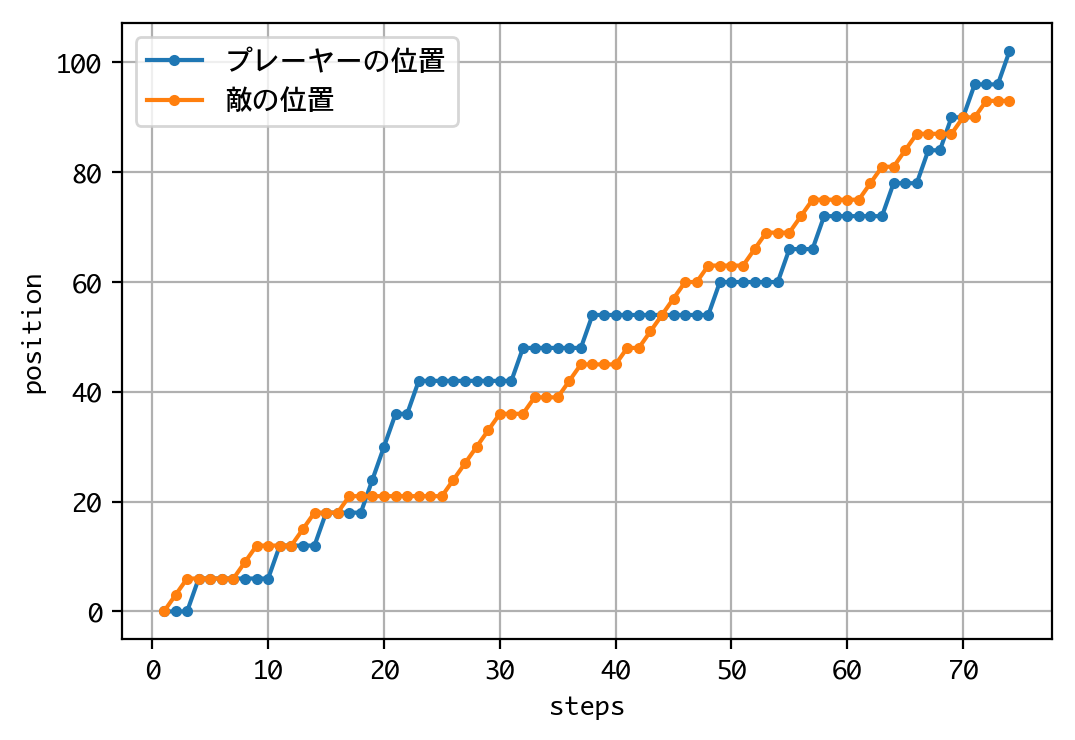

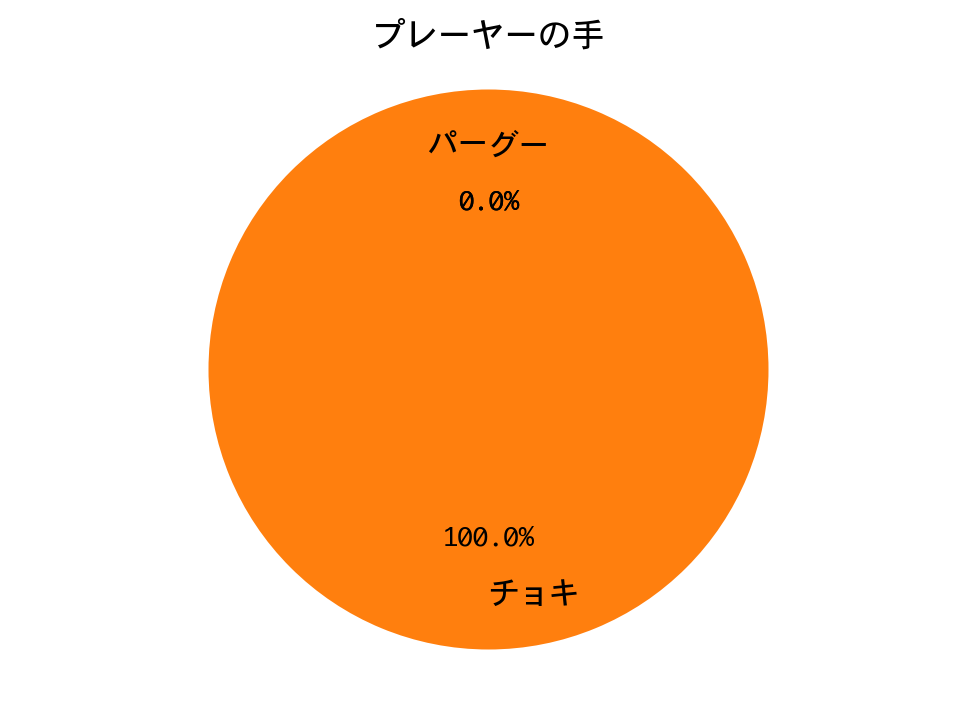

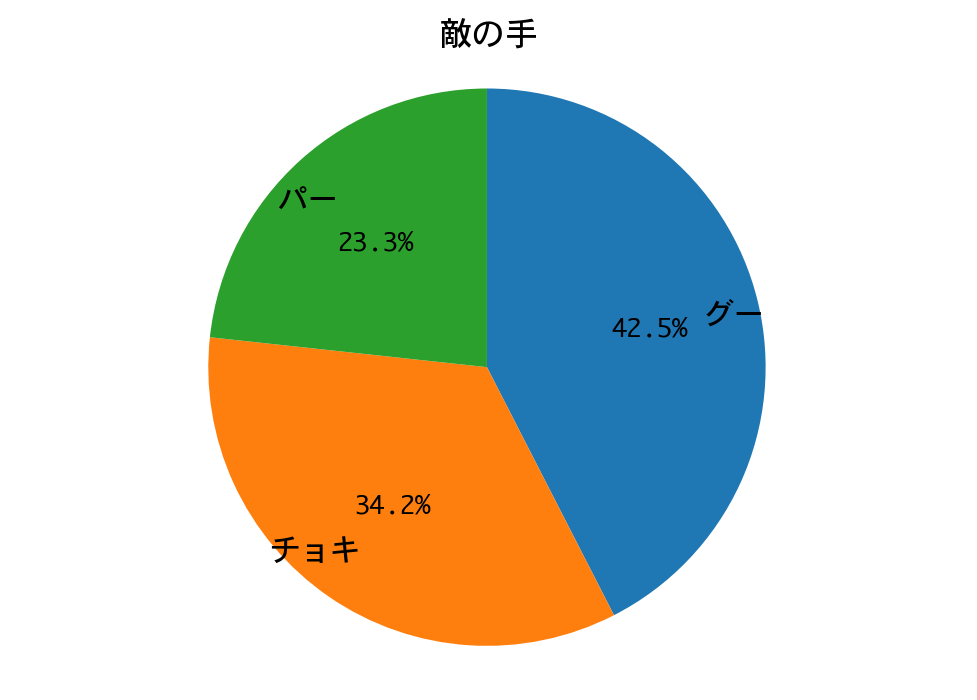

In [4]:
d = DQNJankenGlico(strategy=Strategy.RANDOM, recycle=True)
h = d.test(nb_episodes=1, verbose=1, visualize=True)
visualize_positions(d.env)
visualize_hands(d.env)

プレーヤーがDQNで、敵が戦略側です。結果は、接戦でしたが、敗れました。

続いて1000戦して、勝率（DQNから見た勝率）を見てみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
勝率(1000戦)：0.986


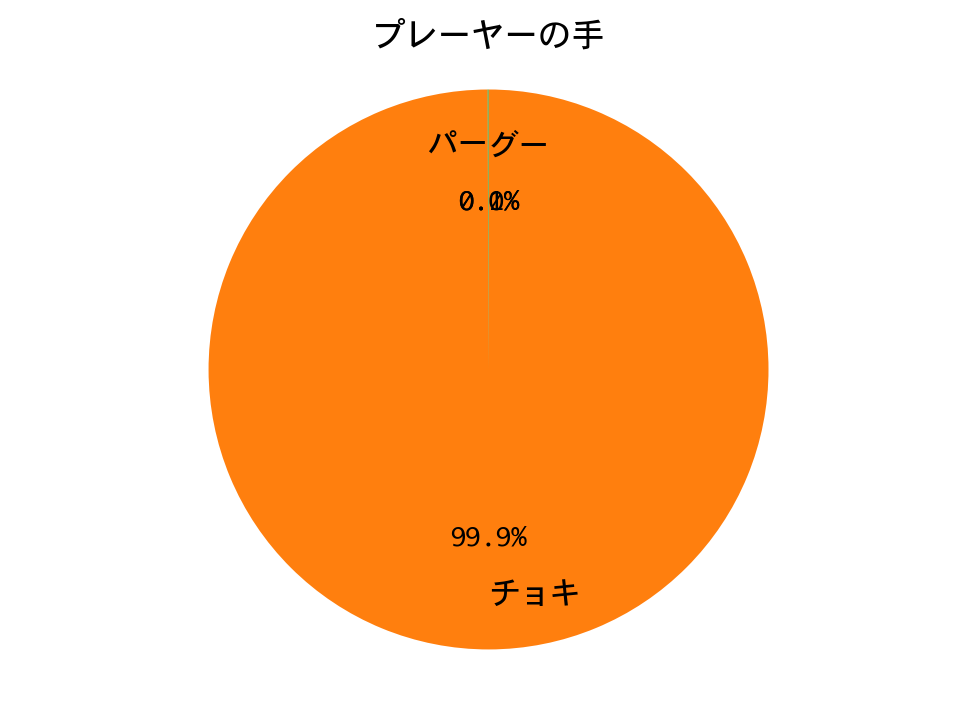

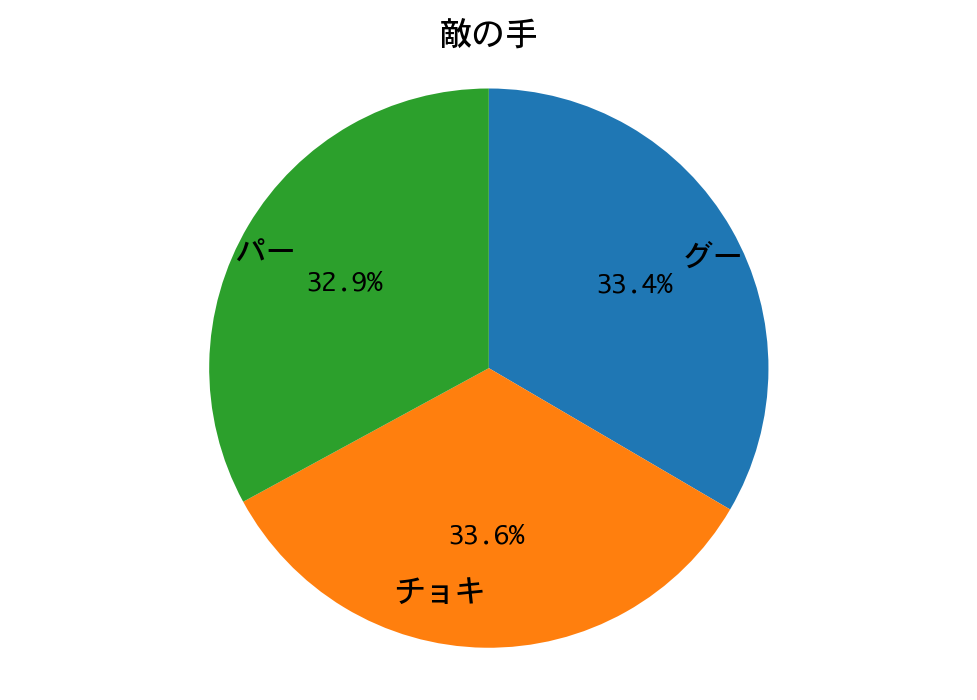

In [5]:
d = DQNJankenGlico(strategy=Strategy.RANDOM, recycle=True)
h = d.test(nb_episodes=1000, visualize=False, verbose=0)

rwds = h.history['episode_reward']
win_rate = sum(rwd > 0 for rwd in rwds) / len(rwds)
print('勝率(1000戦)：' + str(win_rate))

visualize_hands(d.env)

勝率は98.6%。一回戦は、DQNの圧勝で終わりました。

DQNは、ほぼチョキしか出していません。数学的に導き出される性質（数学的性質の1参照）を、機械学習が再発見するというのは、本当に興味深いものです。

## 二回戦：人間戦略 vs DQN

人間戦略は、グー、チョキ、パーを、0.350：0.317：0.333の比で出します。

まずは、モデルの訓練です。

モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 40000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 4s 2ms/step - reward: 18.0000
39 episodes - episode_reward: 923.077 [0.000, 1000.000] - loss: 5664.566 - mean_q: 117.296

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 15.5000
40 episodes - episode_reward: 775.000 [0.000, 1000.000] - loss: 1736.287 - mean_q: 338.839

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 12.0000
37 episodes - episode_reward: 648.649 [0.000, 1000.000] - loss: 2239.740 - mean_q: 611.846

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 11.5000
38 episodes - episode_reward: 605.263 [0.000, 1000.000] - loss: 7612.641 - mean_q: 924.406

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 8.5000
37 episodes - episode_

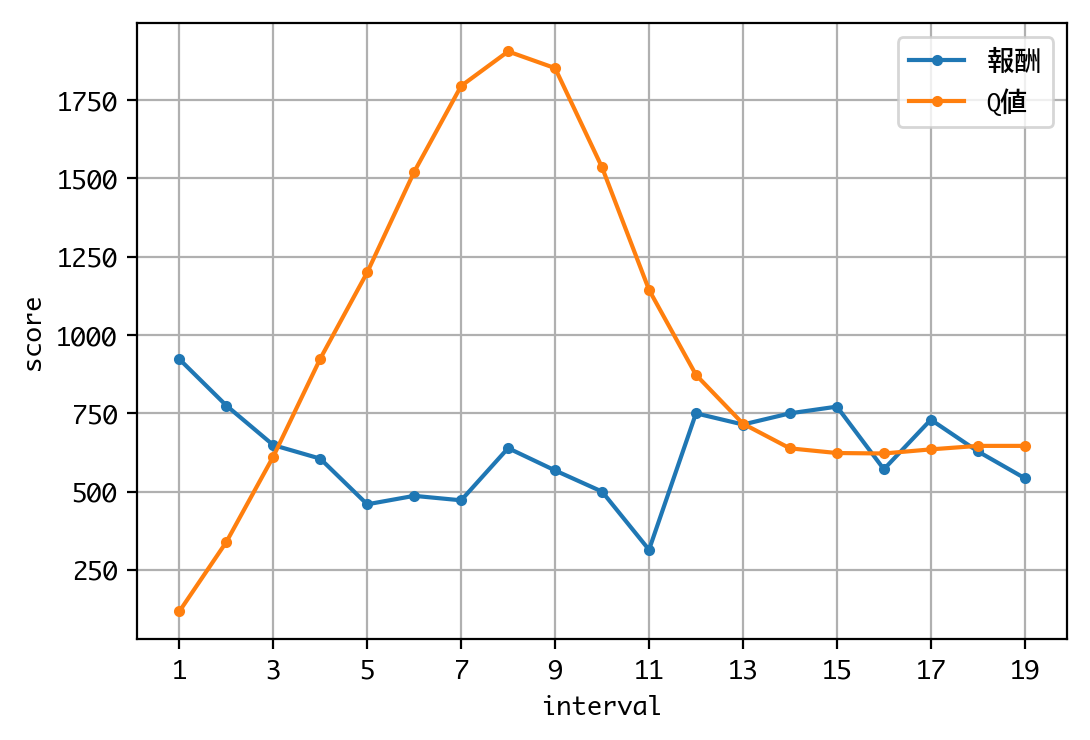

In [6]:
d = DQNJankenGlico(strategy=Strategy.HUMAN, recycle=False)
h = d.train(nb_steps=40000, log_interval=2000, verbose=1)

Q値を見る限り、学習は収束しているようですね。

それでは、ひと勝負しましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
Testing for 1 episodes ...

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：6、敵の位置：0

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：12、敵の位置：0

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：12、敵の位置：0

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：12、敵の位置：0

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：12、敵の位置：0

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：18、敵の位置：0

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：18、敵の位置：0

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：18、敵の位置：3

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：24、敵の位置：3

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：24、敵の位置：3

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：24、敵の位置：3

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：24、敵の位置：3

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：30、敵の位置：3

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：36、敵の位置：3

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：42、敵の位置：3

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：42、敵の位置：6

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：42、敵の位置：9

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：42、敵の位置：12

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：48、敵の位置：12

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：48、敵の位置：15

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：54、敵の位置：15

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：54、敵の位置：15

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：54、敵の位置：18

プレーヤーの手：

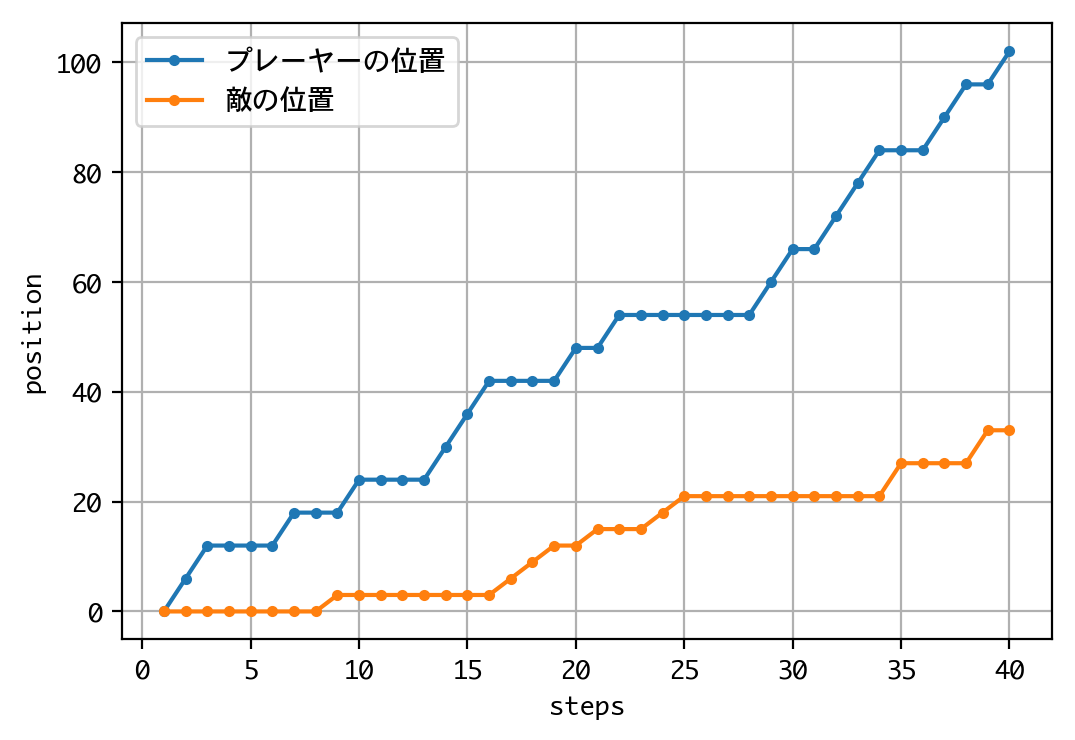

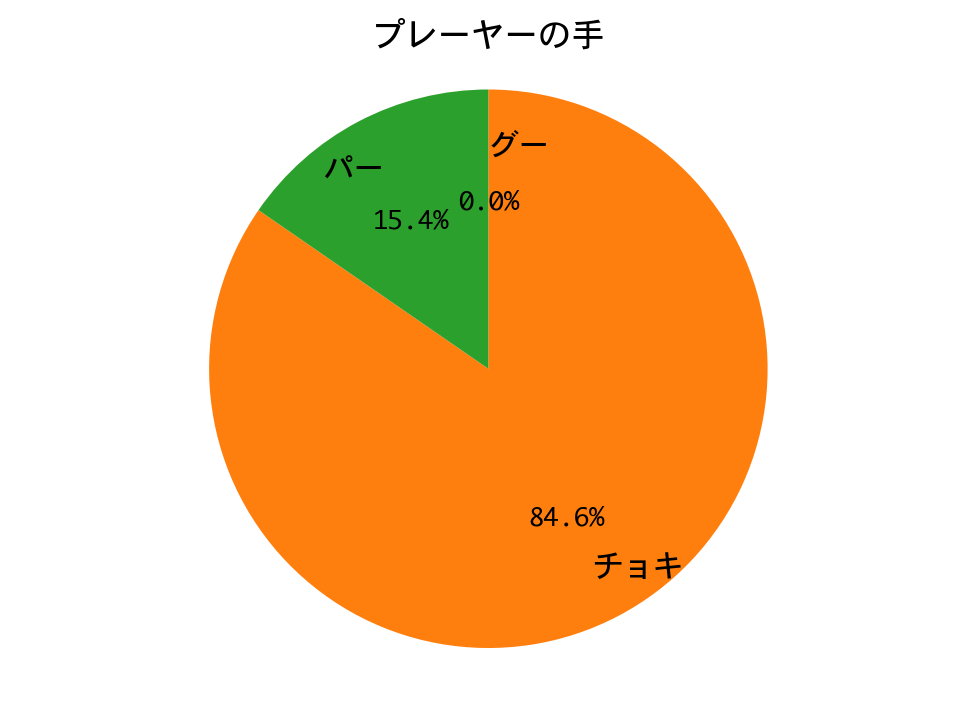

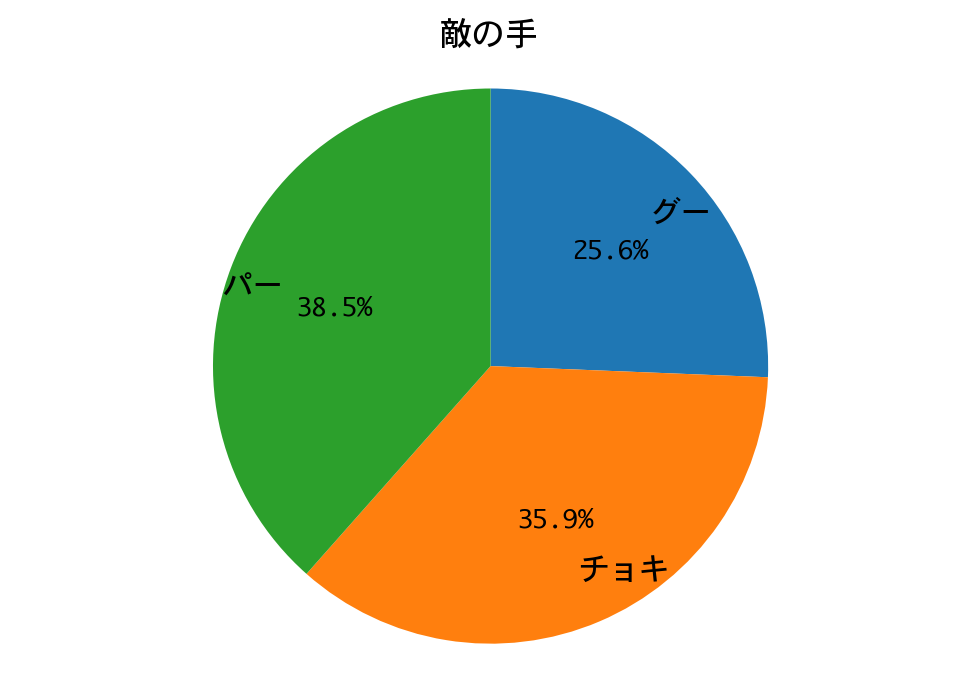

In [7]:
d = DQNJankenGlico(strategy=Strategy.HUMAN, recycle=True)
h = d.test(nb_episodes=1, verbose=1, visualize=True)
visualize_positions(d.env)
visualize_hands(d.env)

結果は、惨敗しました。

続いて1000戦して、勝率を見てみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
勝率(1000戦)：0.99


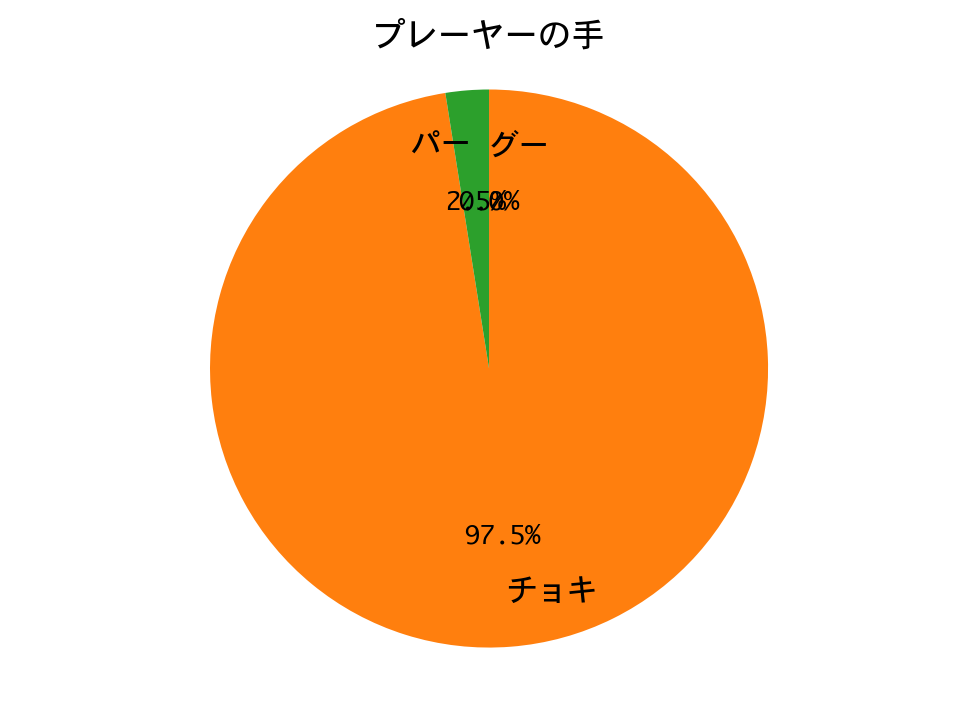

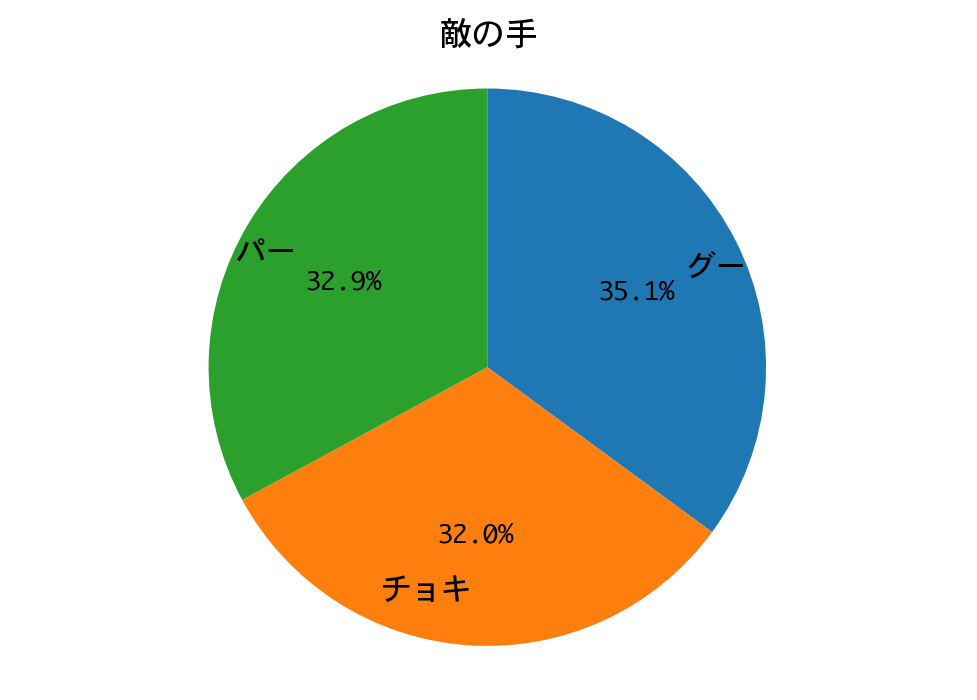

In [8]:
d = DQNJankenGlico(strategy=Strategy.HUMAN, recycle=True)
h = d.test(nb_episodes=1000, visualize=False, verbose=0)

rwds = h.history['episode_reward']
win_rate = sum(rwd > 0 for rwd in rwds) / len(rwds)
print('勝率(1000戦)：' + str(win_rate))

visualize_hands(d.env)

勝率は99%。二回戦も、DQNの圧勝で終わりました。

DQNは、ほぼチョキしか出していません。多少の偏りはあるにせよ戦略側の手はランダムに近いので、一回戦と同じ戦略に帰結したのでしょう。

## 三回戦：カボチャ戦略 vs DQN

カボチャ戦略は、グー、グー、チョキ、パー、チョキ、パー、パー、グーの順で手を出します。

まずは、モデルの訓練です。

モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 40000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 4s 2ms/step - reward: 22.5000
45 episodes - episode_reward: 1000.000 [1000.000, 1000.000] - loss: 6044.898 - mean_q: 132.376

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 18.0000
42 episodes - episode_reward: 857.143 [0.000, 1000.000] - loss: 1551.111 - mean_q: 441.733

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 15.0000
39 episodes - episode_reward: 769.231 [0.000, 1000.000] - loss: 3219.166 - mean_q: 837.371

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 16.5000
39 episodes - episode_reward: 846.154 [0.000, 1000.000] - loss: 9741.396 - mean_q: 1195.834

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 9.0000
36 episodes - epi

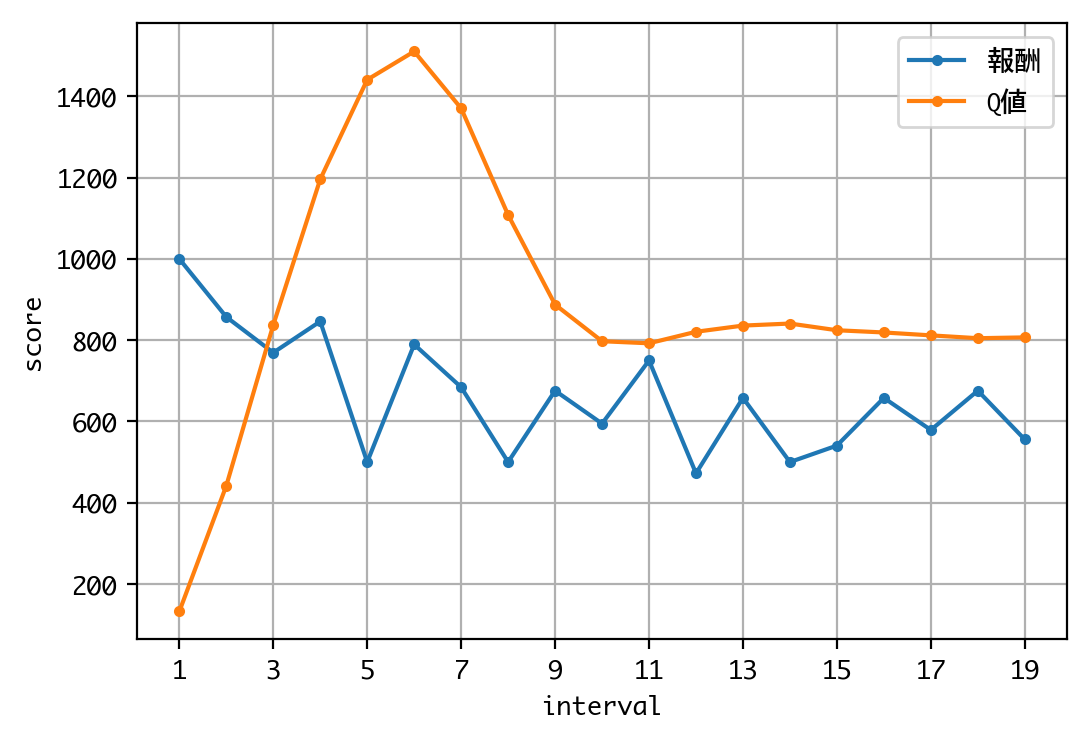

In [9]:
d = DQNJankenGlico(strategy=Strategy.PUMPKIN, recycle=False)
h = d.train(nb_steps=40000, log_interval=2000, verbose=1)

Q値を見る限り、学習は収束しているようですね。

それでは、ひと勝負しましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
Testing for 1 episodes ...

プレーヤーの手：パー、敵の手：グー
プレーヤーの位置：6、敵の位置：0

プレーヤーの手：パー、敵の手：グー
プレーヤーの位置：12、敵の位置：0

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：15、敵の位置：0

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：21、敵の位置：0

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：21、敵の位置：0

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：27、敵の位置：0

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：33、敵の位置：0

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：33、敵の位置：3

プレーヤーの手：グー、敵の手：グー
プレーヤーの位置：33、敵の位置：3

プレーヤーの手：グー、敵の手：グー
プレーヤーの位置：33、敵の位置：3

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：36、敵の位置：3

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：42、敵の位置：3

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：42、敵の位置：3

プレーヤーの手：グー、敵の手：パー
プレーヤーの位置：42、敵の位置：9

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：48、敵の位置：9

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：48、敵の位置：12

プレーヤーの手：グー、敵の手：グー
プレーヤーの位置：48、敵の位置：12

プレーヤーの手：グー、敵の手：グー
プレーヤーの位置：48、敵の位置：12

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：51、敵の位置：12

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：57、敵の位置：12

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：57、敵の位置：12

プレーヤーの手：グー、敵の手：パー
プレーヤーの位置：57、敵の位置：18

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：63、敵の位置：18

プレーヤーの手：チョキ、敵の手：グー


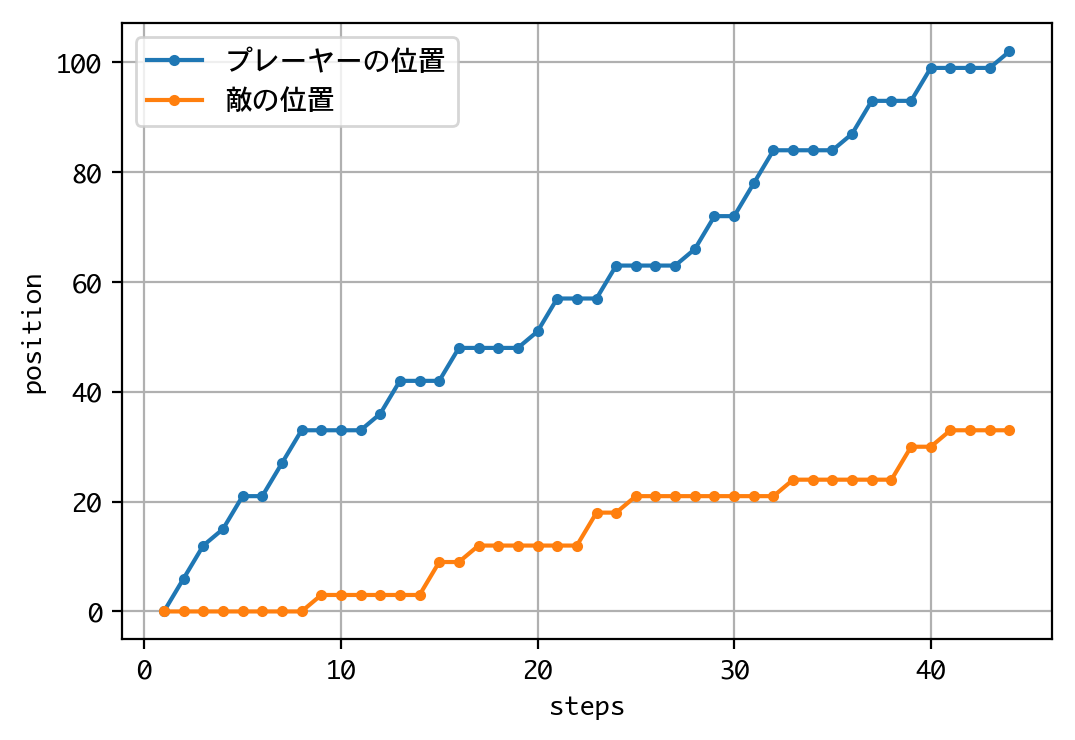

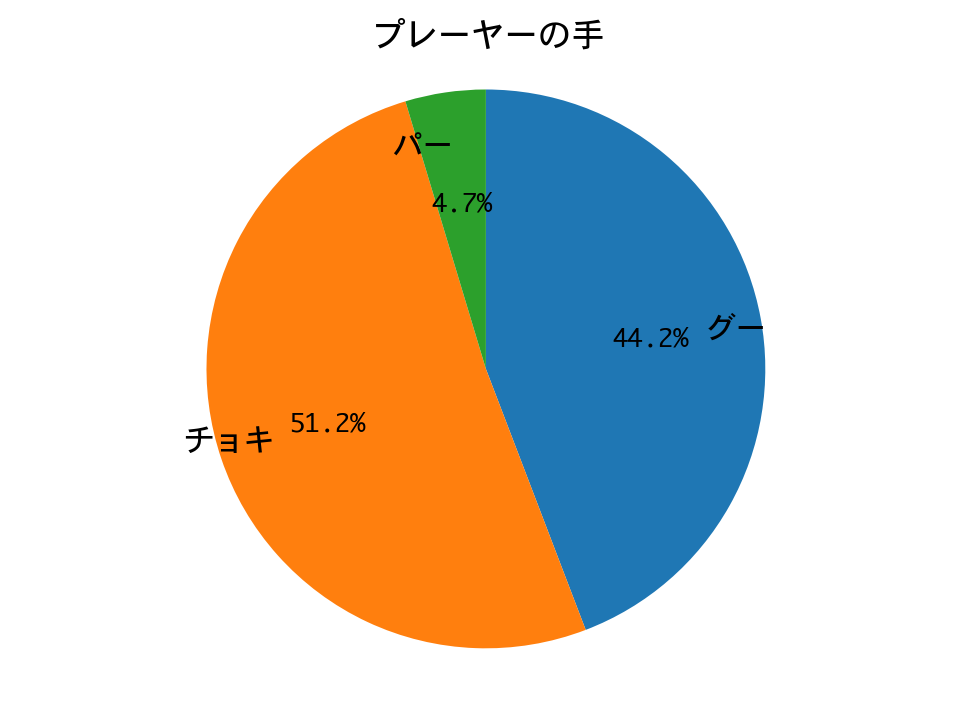

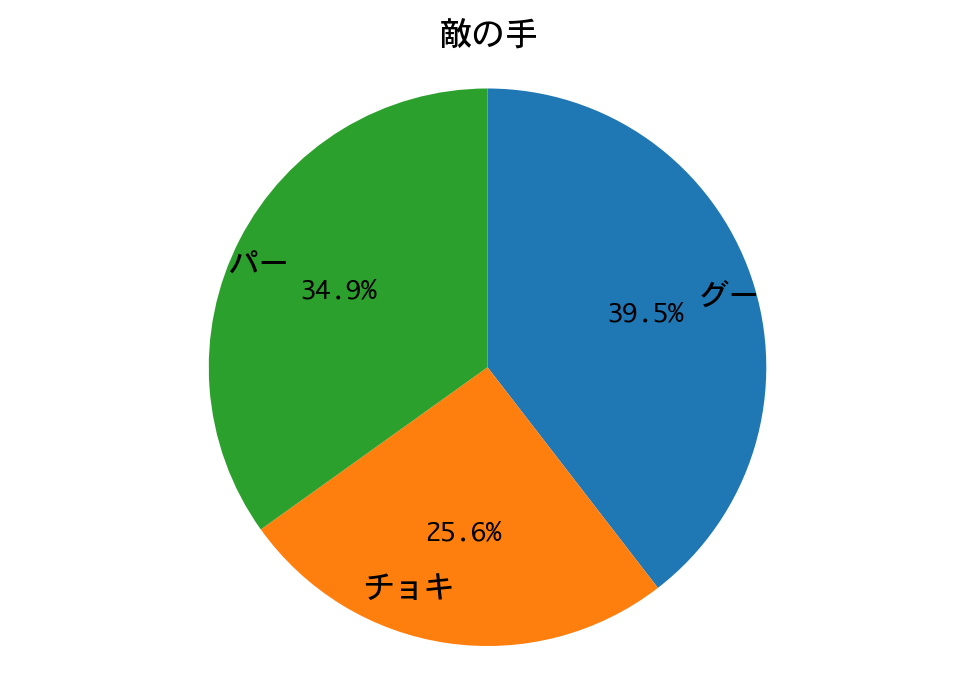

In [10]:
d = DQNJankenGlico(strategy=Strategy.PUMPKIN, recycle=True)
h = d.test(nb_episodes=1, verbose=1, visualize=True)
visualize_positions(d.env)
visualize_hands(d.env)

結果は、またもや惨敗してしまいました。

続いて1000戦して、勝率を見てみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
勝率(1000戦)：1.0


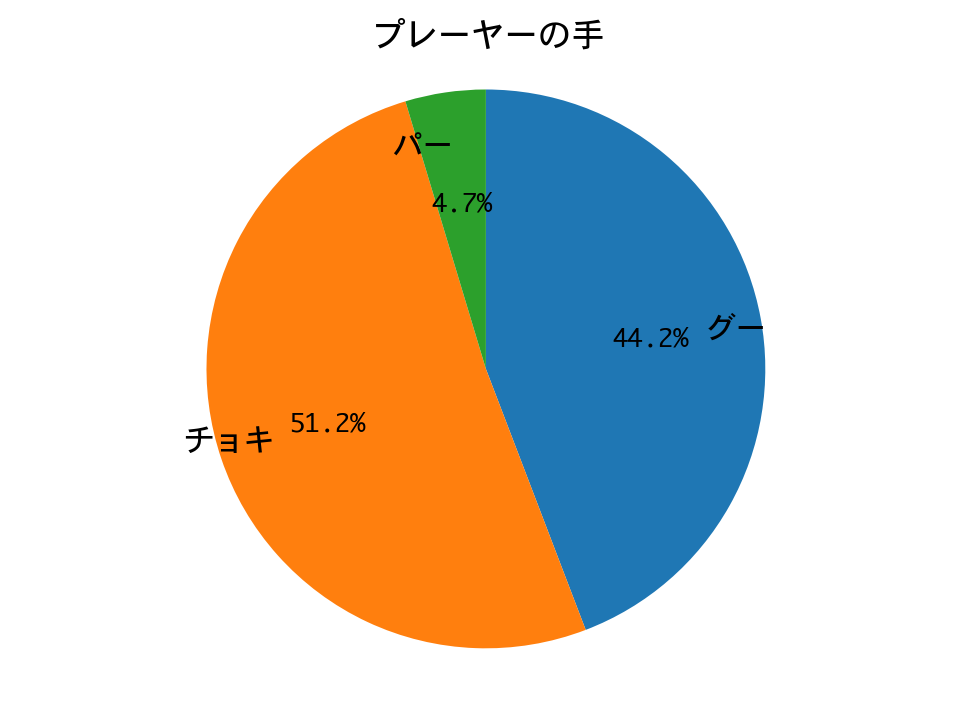

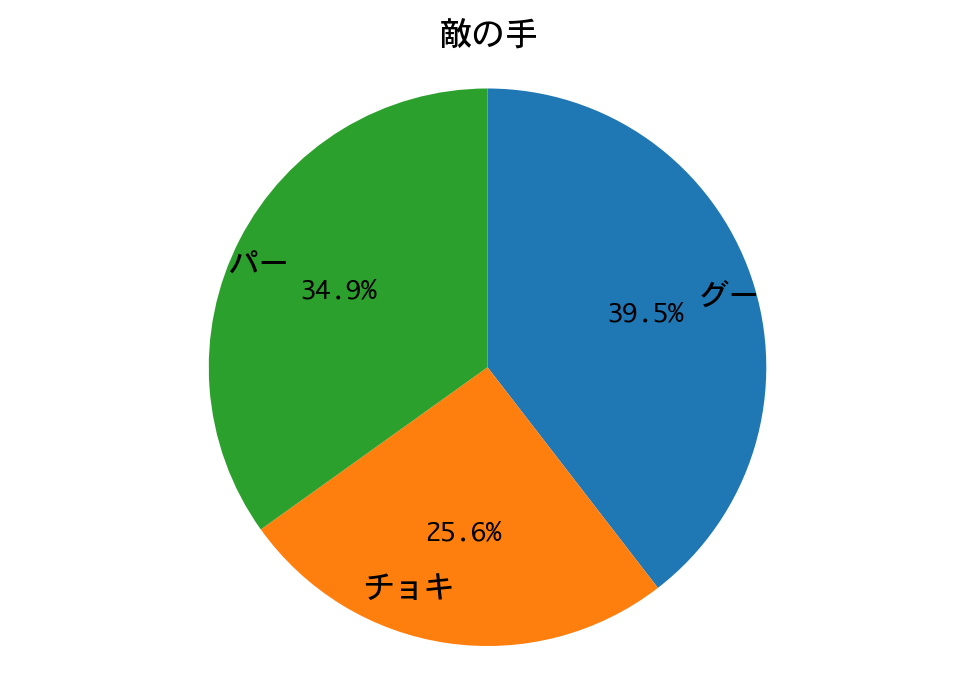

In [11]:
d = DQNJankenGlico(strategy=Strategy.PUMPKIN, recycle=True)
h = d.test(nb_episodes=1000, visualize=False, verbose=0)

rwds = h.history['episode_reward']
win_rate = sum(rwd > 0 for rwd in rwds) / len(rwds)
print('勝率(1000戦)：' + str(win_rate))

visualize_hands(d.env)

勝率は100%！　三回戦もDQNの圧勝で終わりました。

プレーヤー（DQN）の手の構成比が、ひと勝負したときと完全に一致しています。カボチャは手のパターンが決まっているので、DQNが完全に勝ちパターンを学習したのだろうと推測されます。

## 四回戦：期待値最大化戦略 vs DQN

期待値最大化戦略は、ひたすらチョキを出し続けます。

まずは、モデルの訓練です。

モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 40000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 5s 2ms/step - reward: 11.5000
72 episodes - episode_reward: 319.444 [0.000, 1000.000] - loss: 1564.217 - mean_q: 28.418

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 17.0000
41 episodes - episode_reward: 829.268 [0.000, 1000.000] - loss: 813.009 - mean_q: 327.328

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 1.5000
33 episodes - episode_reward: 90.909 [0.000, 1000.000] - loss: 2167.648 - mean_q: 664.102

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 0.0000e+00
37 episodes - episode_reward: 0.000 [0.000, 0.000] - loss: 3705.640 - mean_q: 829.520

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 0.0000e+00
39 episodes - episode_re

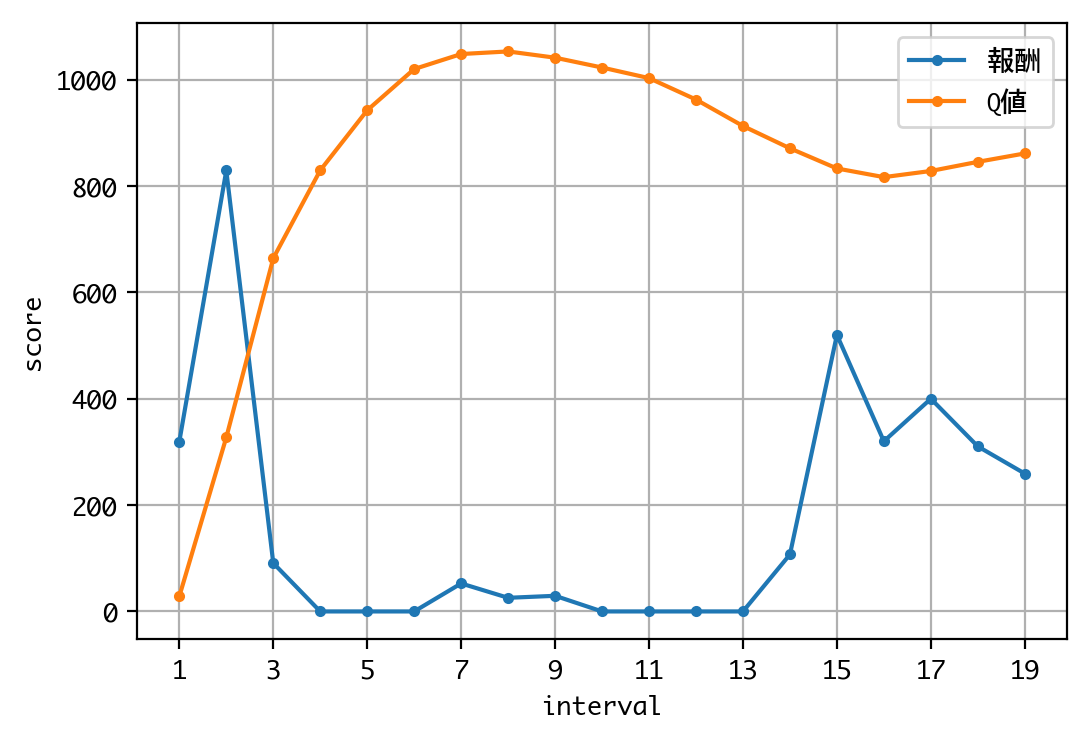

In [12]:
d = DQNJankenGlico(strategy=Strategy.MAXIMUM, recycle=False)
h = d.train(nb_steps=40000, log_interval=2000, verbose=1)

Q値を見る限り、学習は収束しているようですね。

それでは、ひと勝負しましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
Testing for 1 episodes ...

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：3、敵の位置：0

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：3、敵の位置：6

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：6、敵の位置：6

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：6、敵の位置：12

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：9、敵の位置：12

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：9、敵の位置：18

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：12、敵の位置：18

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：12、敵の位置：24

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：15、敵の位置：24

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：15、敵の位置：30

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：18、敵の位置：30

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：18、敵の位置：36

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：21、敵の位置：36

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：21、敵の位置：42

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：24、敵の位置：42

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：24、敵の位置：48

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：27、敵の位置：48

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：30、敵の位置：48

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：33、敵の位置：48

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：36、敵の位置：48

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：39、敵の位置：48

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：42、敵の位置：48

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：45、敵の位置：48

プレーヤーの手

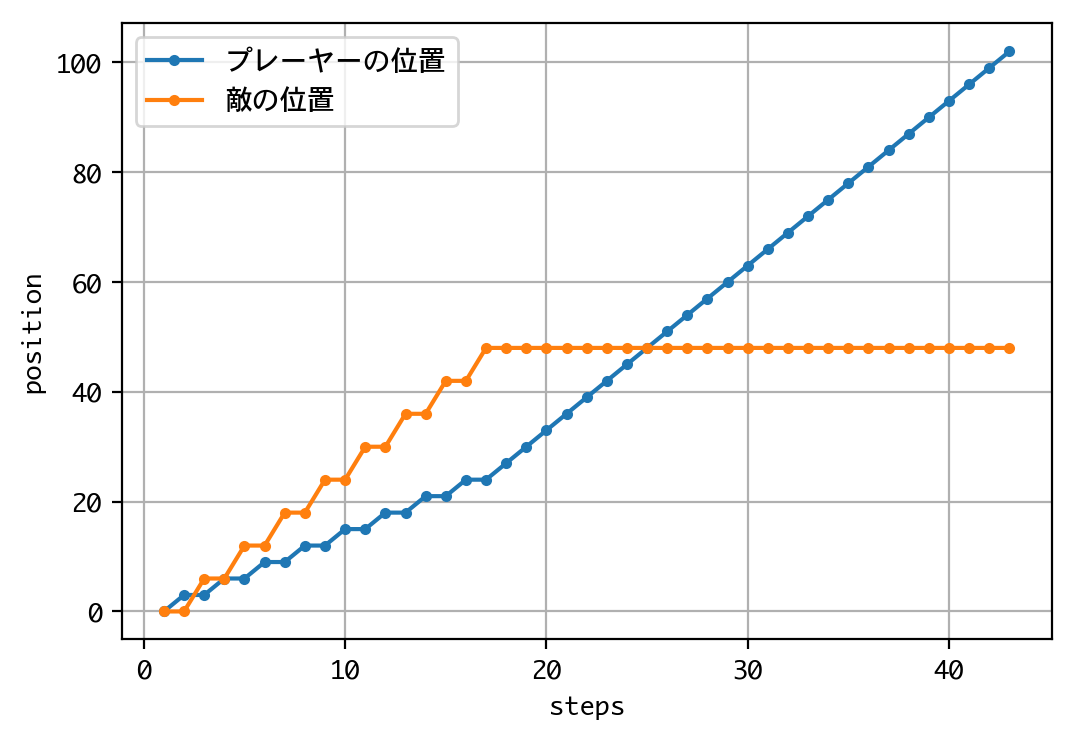

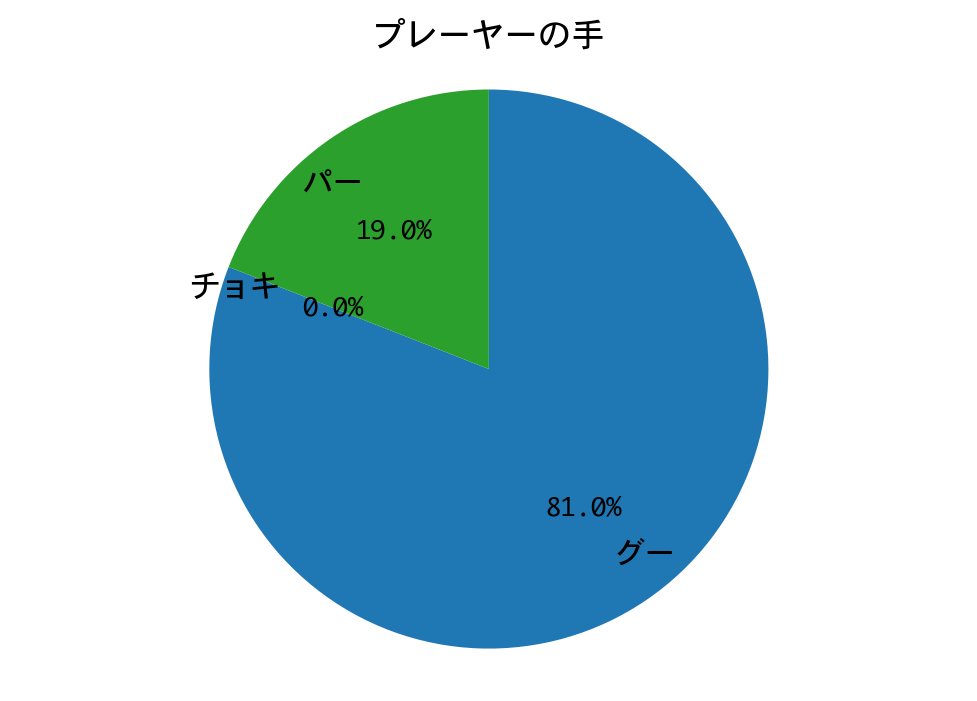

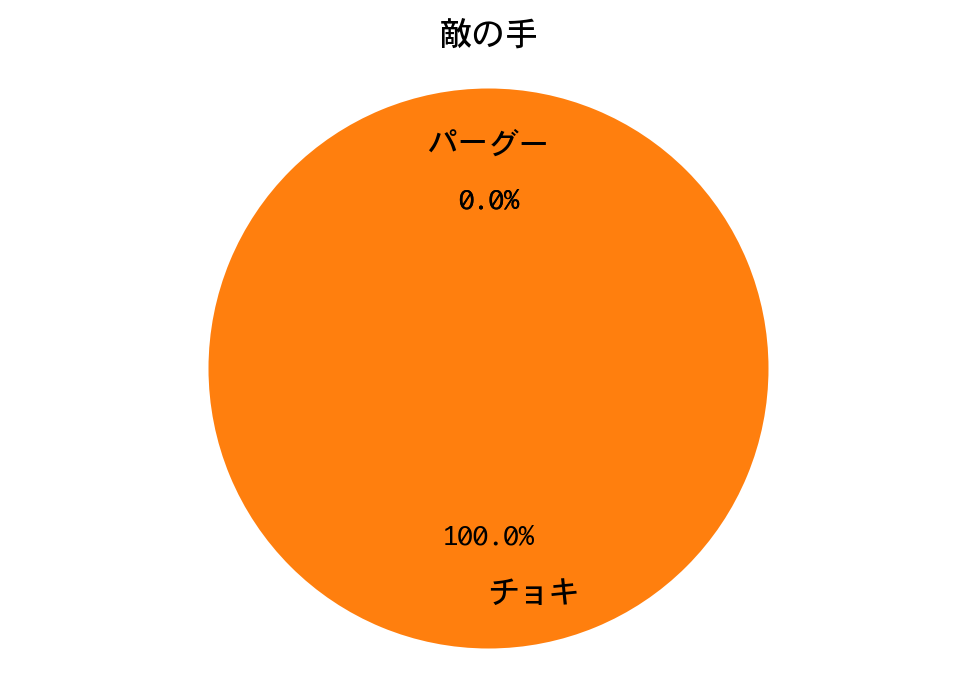

In [13]:
d = DQNJankenGlico(strategy=Strategy.MAXIMUM, recycle=True)
h = d.test(nb_episodes=1, verbose=1, visualize=True)
visualize_positions(d.env)
visualize_hands(d.env)

結果は、戦略側が先行したのですが、中盤から一方的に攻められ、逆転負けしました。

続いて1000戦して、勝率を見てみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
勝率(1000戦)：1.0


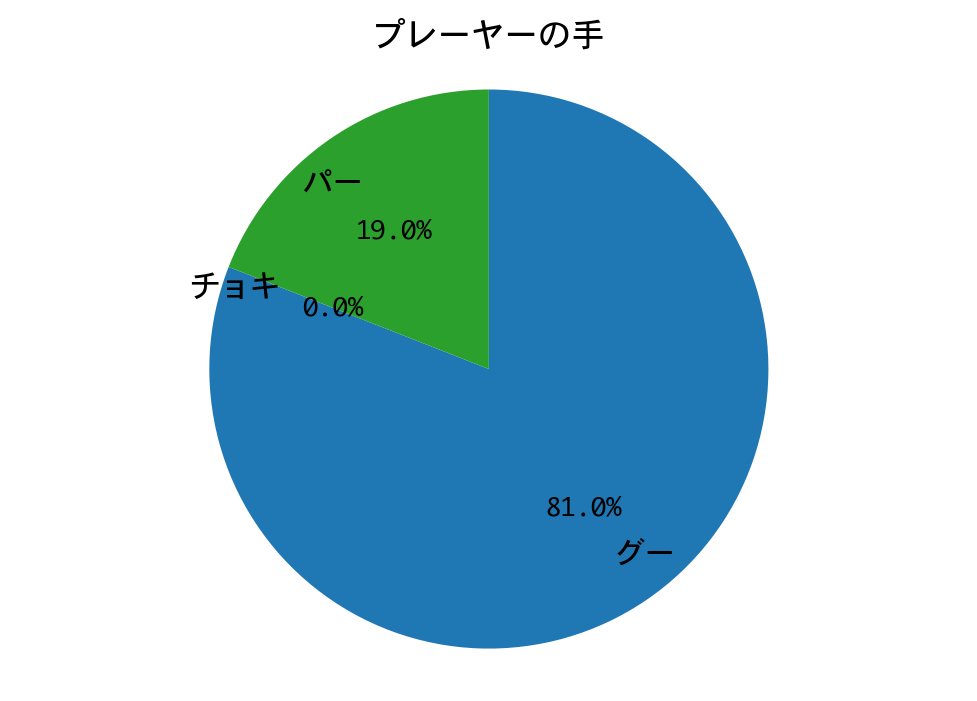

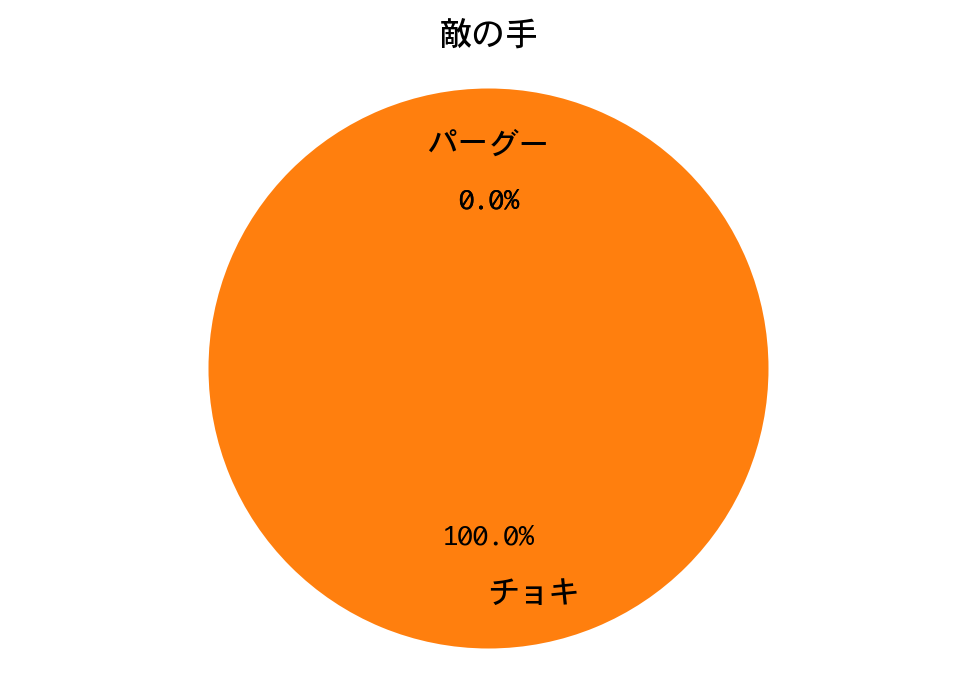

In [14]:
d = DQNJankenGlico(strategy=Strategy.MAXIMUM, recycle=True)
h = d.test(nb_episodes=1000, visualize=False, verbose=0)

rwds = h.history['episode_reward']
win_rate = sum(rwd > 0 for rwd in rwds) / len(rwds)
print('勝率(1000戦)：' + str(win_rate))

visualize_hands(d.env)

勝率は100%！　四回戦もDQNの圧勝で終わりました。

三回戦と同様、プレーヤー（DQN）の手の構成比が、ひと勝負したときと完全に一致しています。期待値最大化戦略は手のパターンが決まっているので、DQNが完全に勝ちパターンを学習したのだろうと推測されます。

## 五回戦：ナッシュ均衡戦略 vs DQN

ナッシュ均衡戦略は、グー、チョキ、パーを、0.4：0.4：0.2の比で出します。

まずは、モデルの訓練です。

モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 40000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 5s 3ms/step - reward: 14.5000
45 episodes - episode_reward: 644.444 [0.000, 1000.000] - loss: 4635.882 - mean_q: 107.790

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 7s 3ms/step - reward: 14.0000
45 episodes - episode_reward: 622.222 [0.000, 1000.000] - loss: 2148.854 - mean_q: 324.027

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 7s 3ms/step - reward: 12.0000
45 episodes - episode_reward: 533.333 [0.000, 1000.000] - loss: 2473.935 - mean_q: 499.774

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 7s 4ms/step - reward: 10.0000
44 episodes - episode_reward: 454.545 [0.000, 1000.000] - loss: 3367.789 - mean_q: 610.587

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 10.5000
40 episodes - episode

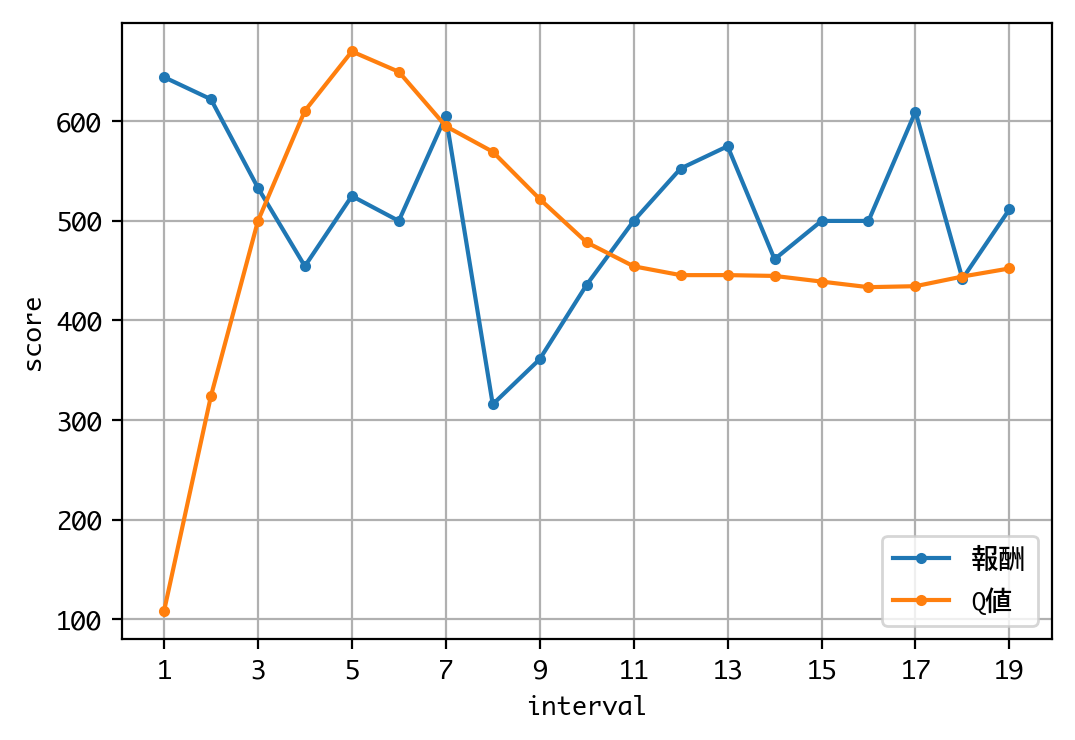

In [15]:
d = DQNJankenGlico(strategy=Strategy.NASH, recycle=False)
h = d.train(nb_steps=40000, log_interval=2000, verbose=1)

Q値を見る限り、学習は収束しているようですね。

それでは、ひと勝負しましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
Testing for 1 episodes ...

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：0、敵の位置：0

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：3、敵の位置：0

プレーヤーの手：パー、敵の手：グー
プレーヤーの位置：9、敵の位置：0

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：9、敵の位置：6

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：9、敵の位置：12

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：9、敵の位置：18

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：9、敵の位置：24

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：9、敵の位置：24

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：9、敵の位置：30

プレーヤーの手：パー、敵の手：グー
プレーヤーの位置：15、敵の位置：30

プレーヤーの手：パー、敵の手：グー
プレーヤーの位置：21、敵の位置：30

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：21、敵の位置：36

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：21、敵の位置：42

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：21、敵の位置：48

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：21、敵の位置：48

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：21、敵の位置：51

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：21、敵の位置：54

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：21、敵の位置：57

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：21、敵の位置：57

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：21、敵の位置：60

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：21、敵の位置：63

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：21、敵の位置：66

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：21、敵の位置：66

プレーヤーの手：チョキ、敵

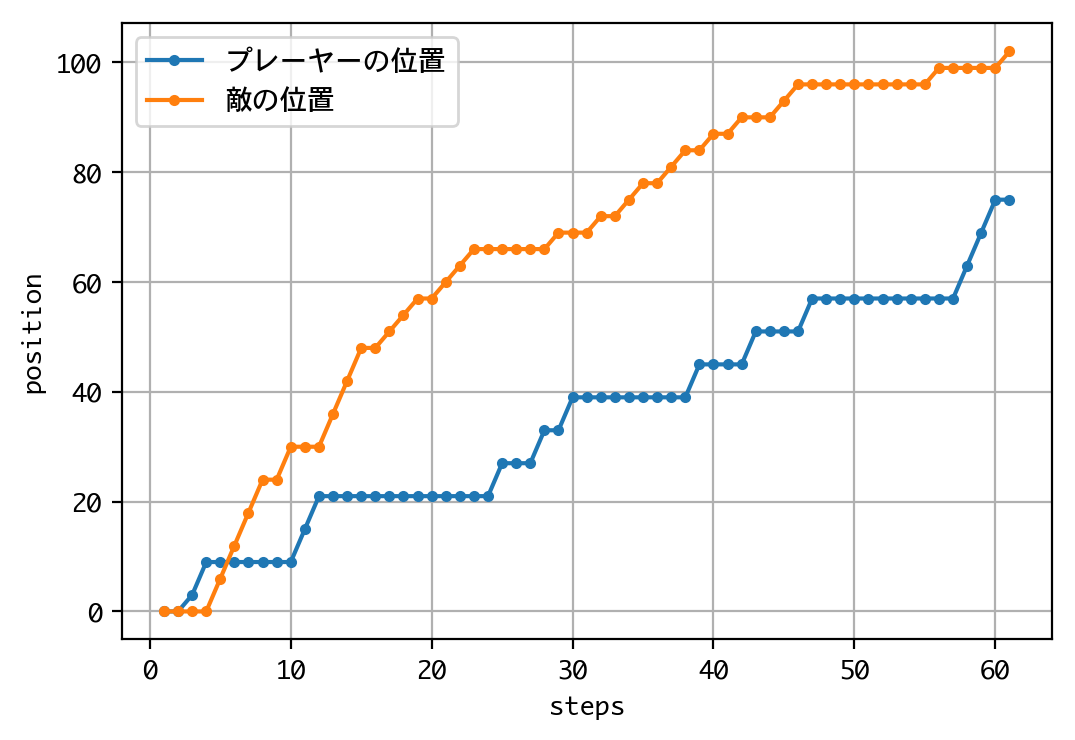

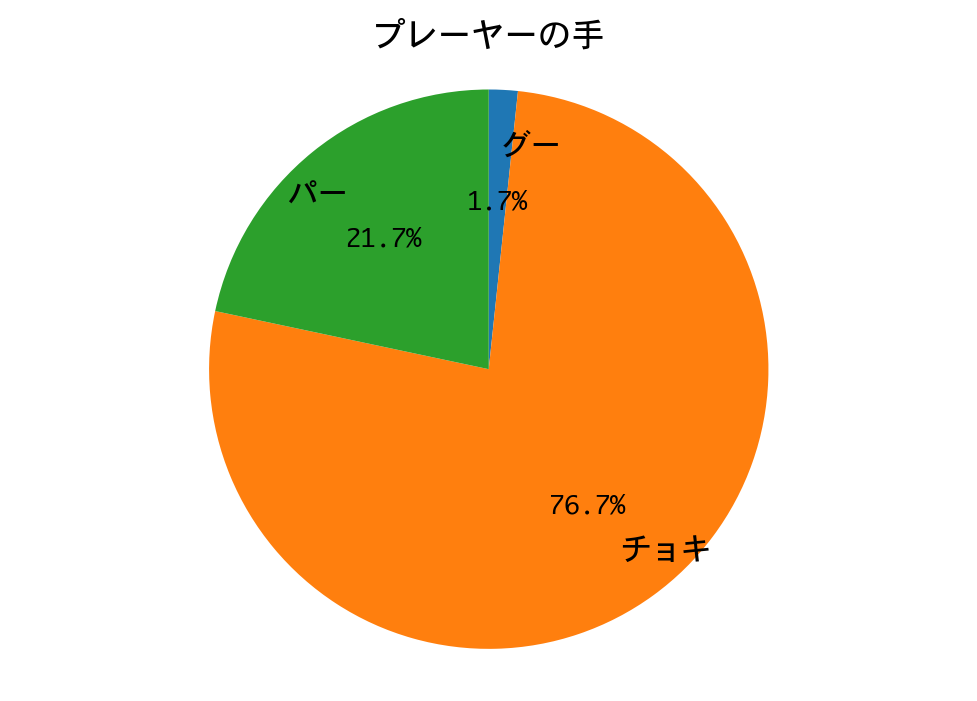

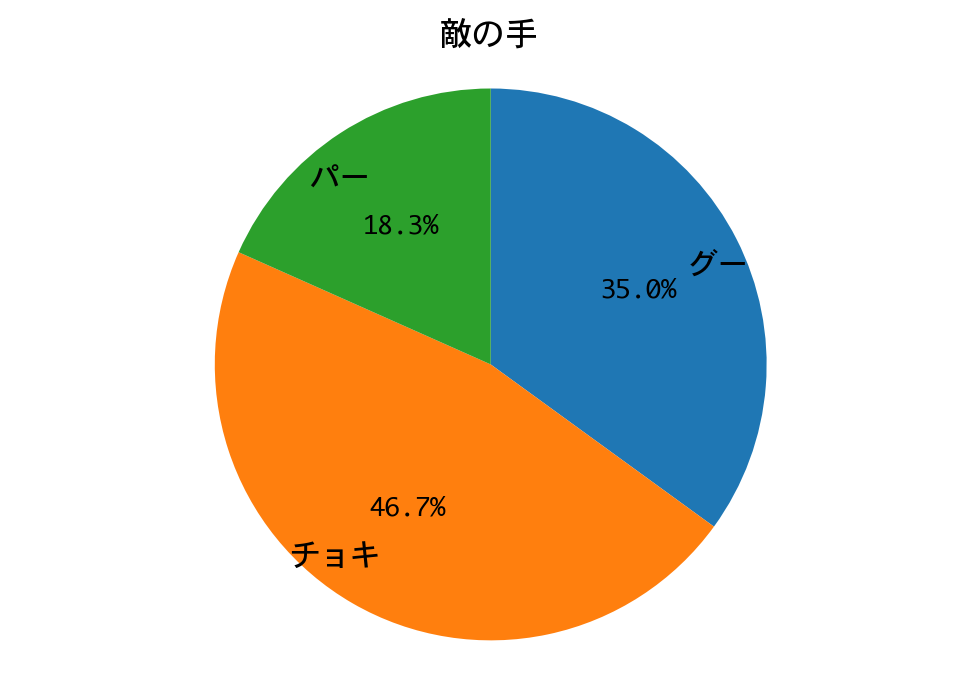

In [16]:
d = DQNJankenGlico(strategy=Strategy.NASH, recycle=True)
h = d.test(nb_episodes=1, verbose=1, visualize=True)
visualize_positions(d.env)
visualize_hands(d.env)

初めてDQNに勝ちました！

続いて1000戦して、勝率を見てみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
勝率(1000戦)：0.453


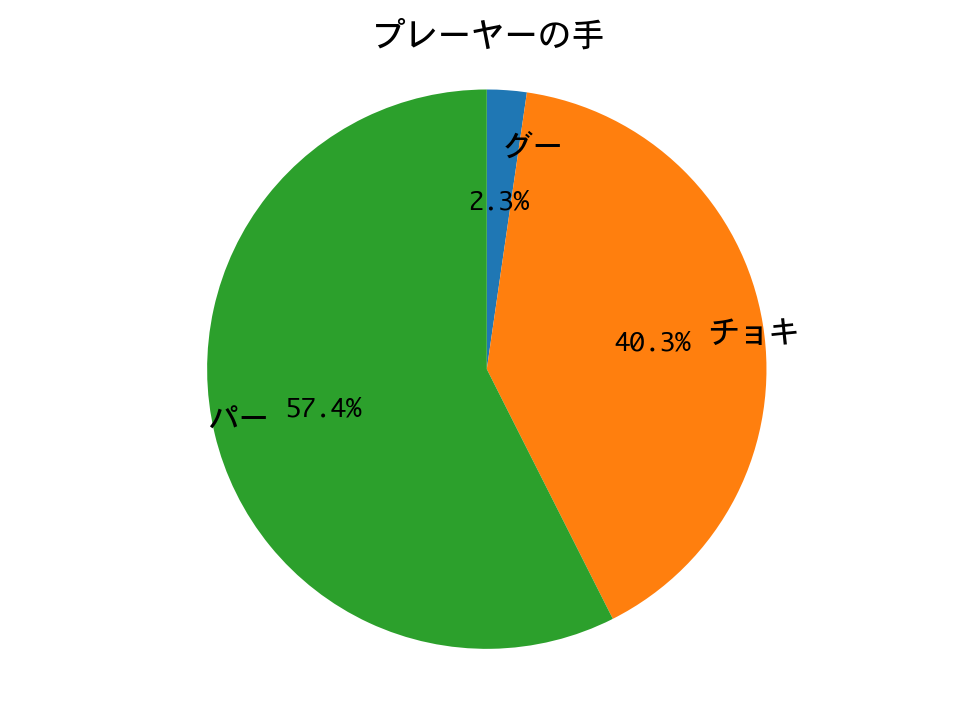

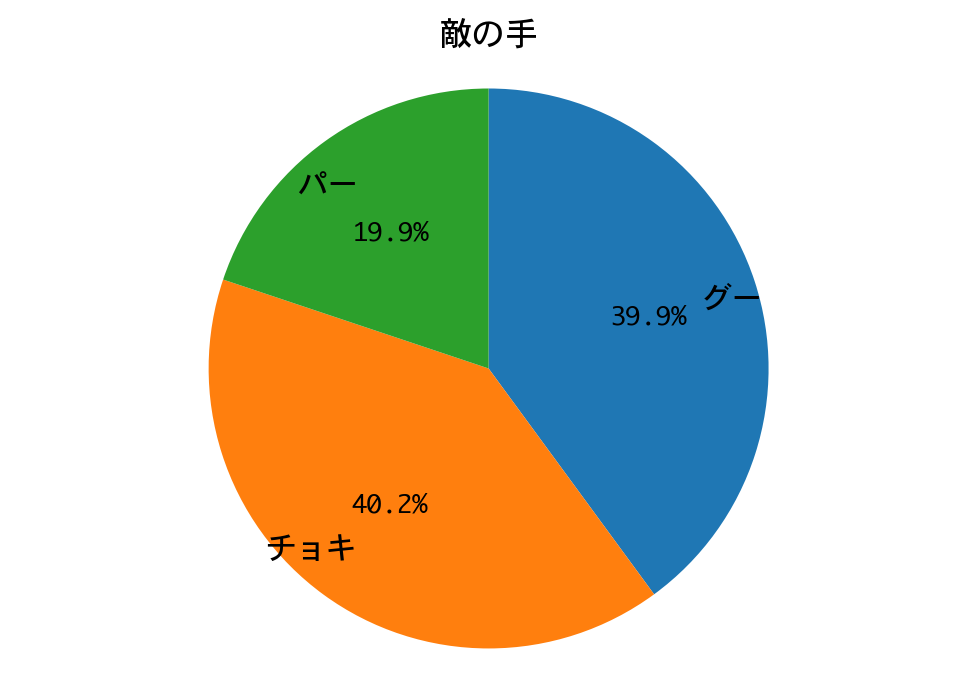

In [17]:
d = DQNJankenGlico(strategy=Strategy.NASH, recycle=True)
h = d.test(nb_episodes=1000, visualize=False, verbose=0)

rwds = h.history['episode_reward']
win_rate = sum(rwd > 0 for rwd in rwds) / len(rwds)
print('勝率(1000戦)：' + str(win_rate))

visualize_hands(d.env)

DQNの勝率は45.3%。僅差ではありますが、ナッシュ均衡戦略の勝利と言ってよいでしょう！

初めてDQNに勝つことができました！

数学的に導き出される性質（数学的性質の2参照）が、こうして統計的にも確認されたわけです。

## 六回戦：記憶戦略 vs DQN

記憶戦略は、基本的に人間戦略と同じですが、相手の手を記憶し、2連続で同じ手を出してきたときは、その手を負かすような手を出します。

まずは、モデルの訓練です。

モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 40000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 5s 2ms/step - reward: 1.0000
63 episodes - episode_reward: 31.746 [0.000, 1000.000] - loss: 279.190 - mean_q: 8.210

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 3.5000
39 episodes - episode_reward: 179.487 [0.000, 1000.000] - loss: 515.905 - mean_q: 48.465

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 7.0000
39 episodes - episode_reward: 358.974 [0.000, 1000.000] - loss: 838.724 - mean_q: 135.046

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 7s 3ms/step - reward: 8.0000
38 episodes - episode_reward: 421.053 [0.000, 1000.000] - loss: 917.826 - mean_q: 211.753

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 7s 4ms/step - reward: 9.5000
34 episodes - episode_reward: 558.

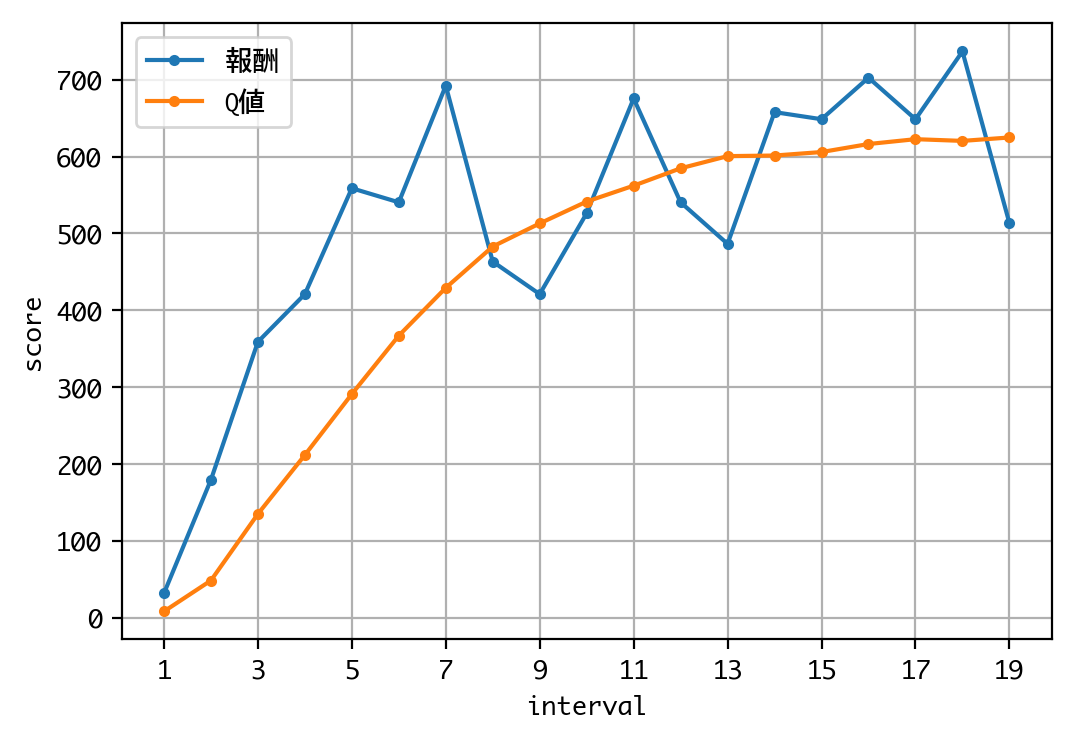

In [18]:
d = DQNJankenGlico(strategy=Strategy.MEMORY, recycle=False)
h = d.train(nb_steps=40000, log_interval=2000, verbose=1)

Q値を見る限り、学習は収束しているようですね。

それでは、ひと勝負しましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
Testing for 1 episodes ...

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：0、敵の位置：3

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：6、敵の位置：3

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：6、敵の位置：6

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：6、敵の位置：9

プレーヤーの手：パー、敵の手：グー
プレーヤーの位置：12、敵の位置：9

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：15、敵の位置：9

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：21、敵の位置：9

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：21、敵の位置：9

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：24、敵の位置：9

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：30、敵の位置：9

プレーヤーの手：パー、敵の手：グー
プレーヤーの位置：36、敵の位置：9

プレーヤーの手：グー、敵の手：パー
プレーヤーの位置：36、敵の位置：15

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：36、敵の位置：15

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：36、敵の位置：21

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：39、敵の位置：21

プレーヤーの手：チョキ、敵の手：パー
プレーヤーの位置：45、敵の位置：21

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：45、敵の位置：21

プレーヤーの手：グー、敵の手：グー
プレーヤーの位置：45、敵の位置：21

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：45、敵の位置：21

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：48、敵の位置：21

プレーヤーの手：チョキ、敵の手：グー
プレーヤーの位置：48、敵の位置：24

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：48、敵の位置：24

プレーヤーの手：グー、敵の手：パー
プレーヤーの位置：48、敵の位置：30

プレーヤーの手：チョキ、敵の手：チョキ
プ

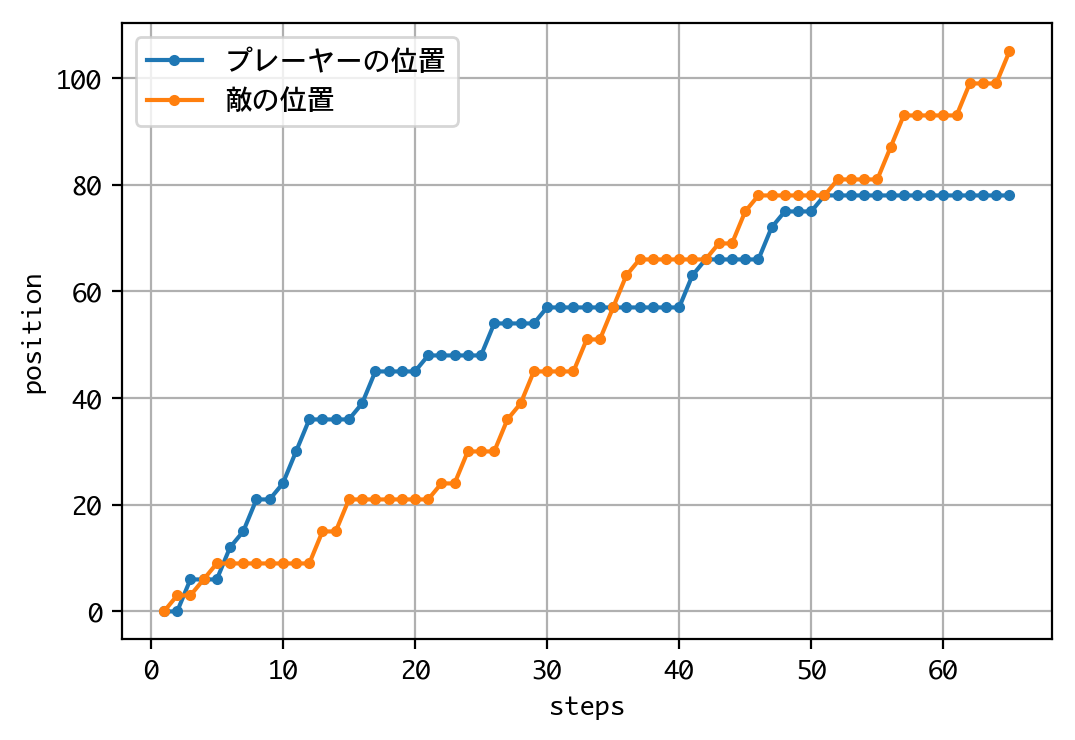

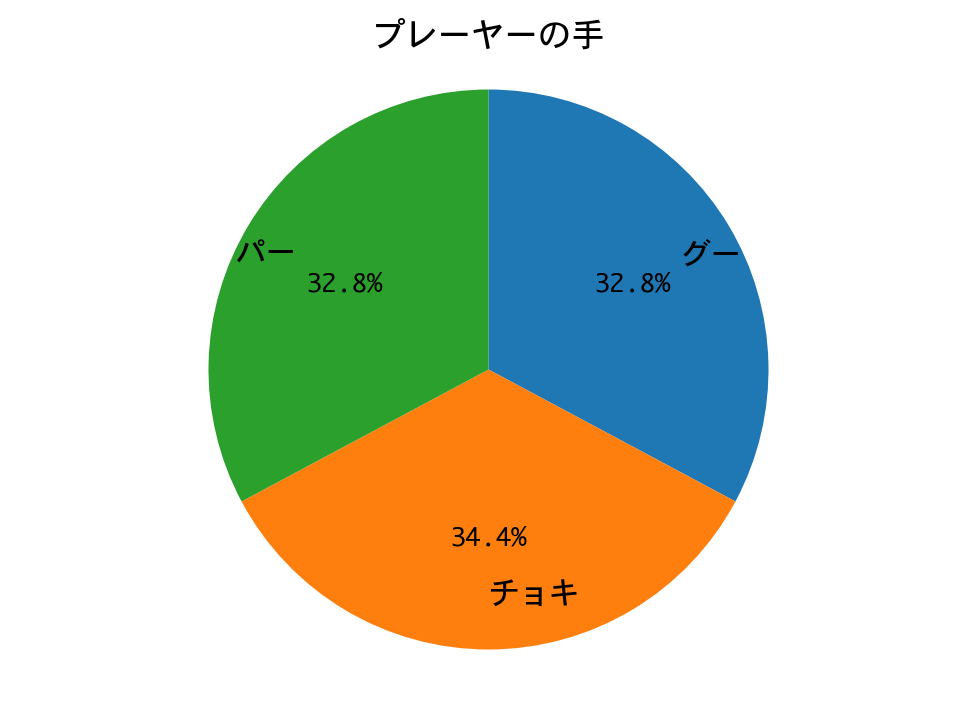

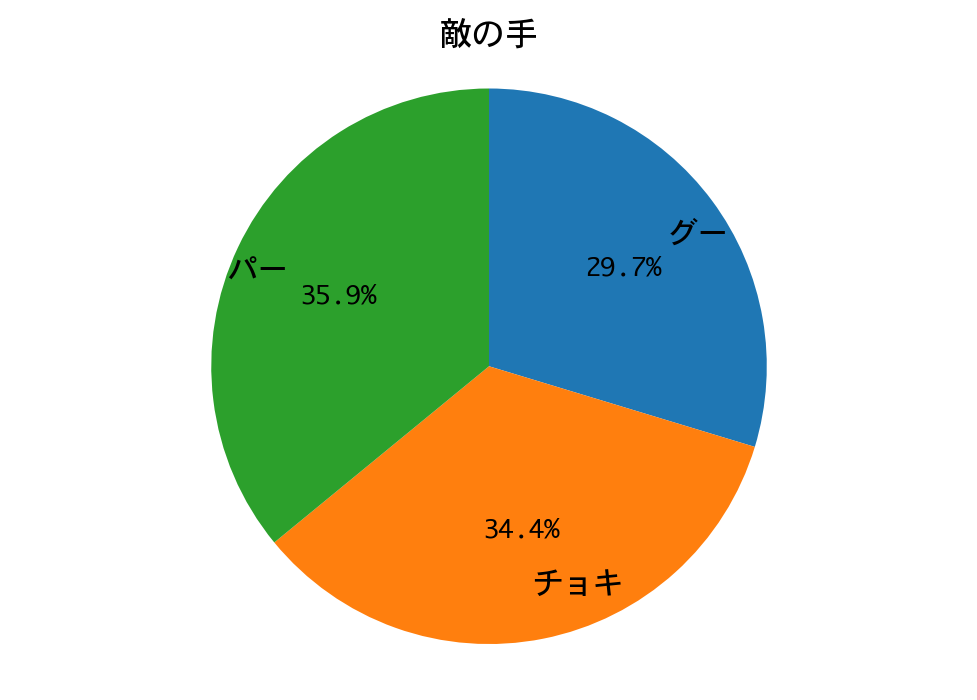

In [19]:
d = DQNJankenGlico(strategy=Strategy.MEMORY, recycle=True)
h = d.test(nb_episodes=1, verbose=1, visualize=True)
visualize_positions(d.env)
visualize_hands(d.env)

結果は、DQNに勝つことができました！　二連勝です。

続いて1000戦して、勝率を見てみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
勝率(1000戦)：0.747


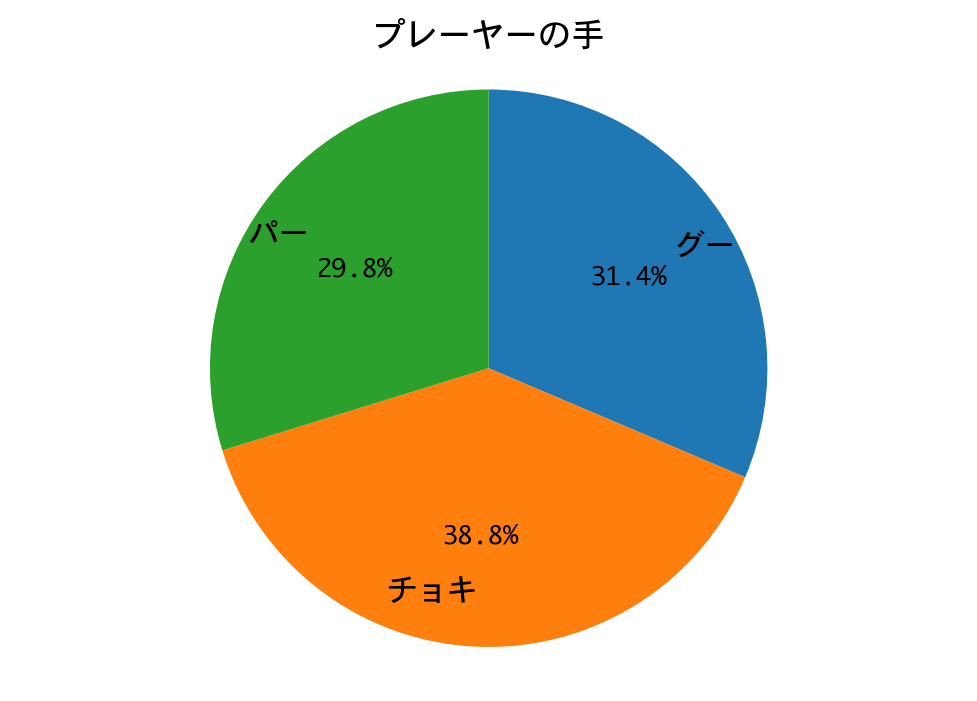

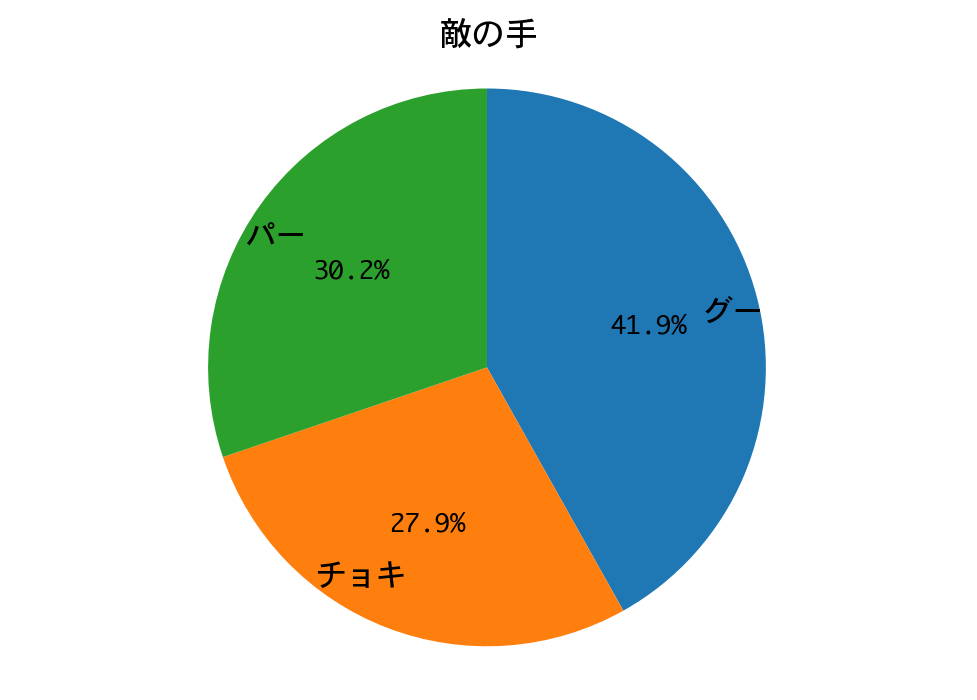

In [20]:
d = DQNJankenGlico(strategy=Strategy.MEMORY, recycle=True)
h = d.test(nb_episodes=1000, visualize=False, verbose=0)

rwds = h.history['episode_reward']
win_rate = sum(rwd > 0 for rwd in rwds) / len(rwds)
print('勝率(1000戦)：' + str(win_rate))

visualize_hands(d.env)

DQNの勝率は74.7%。

DQNの勝ちですが、ナッシュ均衡戦略を除けば、これでも、ここまでで2番目の好成績です。

## 最終戦：多数決戦略 vs DQN

これまでの全戦略で多数決をとって手を出します。

まずは、モデルの訓練です。

モデルを作成します。
モデルを作成しました。
訓練を行うので、お待ちください。
Training for 60000 steps ...
Interval 1 (0 steps performed)
2000/2000 [==============================] - 4s 2ms/step - reward: 1.0000
37 episodes - episode_reward: 54.054 [0.000, 1000.000] - loss: 355.123 - mean_q: 20.132

Interval 2 (2000 steps performed)
2000/2000 [==============================] - 5s 3ms/step - reward: 1.5000
38 episodes - episode_reward: 78.947 [0.000, 1000.000] - loss: 377.018 - mean_q: 44.125

Interval 3 (4000 steps performed)
2000/2000 [==============================] - 5s 3ms/step - reward: 3.5000
35 episodes - episode_reward: 200.000 [0.000, 1000.000] - loss: 616.148 - mean_q: 65.021

Interval 4 (6000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 5.5000
34 episodes - episode_reward: 323.529 [0.000, 1000.000] - loss: 834.640 - mean_q: 101.602

Interval 5 (8000 steps performed)
2000/2000 [==============================] - 6s 3ms/step - reward: 11.0000
33 episodes - episode_reward: 666.

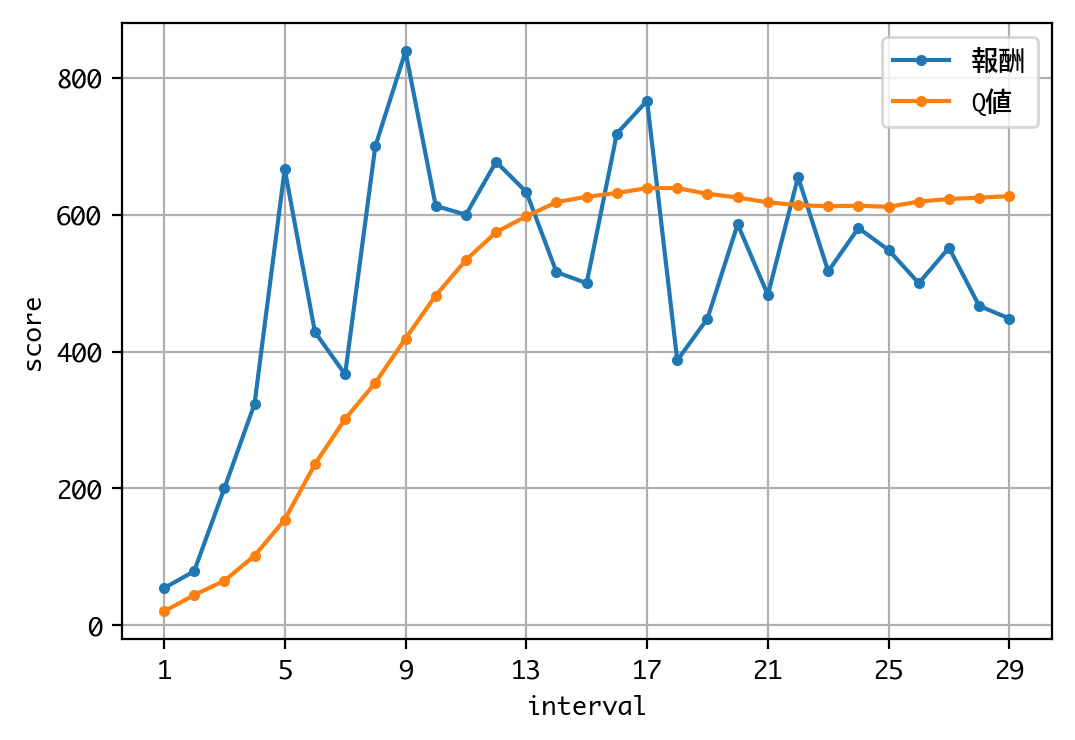

In [2]:
d = DQNJankenGlico(strategy=Strategy.MAJORITY, recycle=False)
h = d.train(nb_steps=60000, log_interval=2000, verbose=1)

Q値を見る限り、学習は収束しているようですね。

それでは、ひと勝負しましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
Testing for 1 episodes ...

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：0、敵の位置：0

プレーヤーの手：グー、敵の手：グー
プレーヤーの位置：0、敵の位置：0

プレーヤーの手：チョキ、敵の手：チョキ
プレーヤーの位置：0、敵の位置：0

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：3、敵の位置：0

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：3、敵の位置：0

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：6、敵の位置：0

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：6、敵の位置：6

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：9、敵の位置：6

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：9、敵の位置：6

プレーヤーの手：グー、敵の手：グー
プレーヤーの位置：9、敵の位置：6

プレーヤーの手：パー、敵の手：グー
プレーヤーの位置：15、敵の位置：6

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：18、敵の位置：6

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：18、敵の位置：6

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：21、敵の位置：6

プレーヤーの手：パー、敵の手：グー
プレーヤーの位置：27、敵の位置：6

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：30、敵の位置：6

プレーヤーの手：パー、敵の手：パー
プレーヤーの位置：30、敵の位置：6

プレーヤーの手：グー、敵の手：チョキ
プレーヤーの位置：33、敵の位置：6

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：33、敵の位置：12

プレーヤーの手：グー、敵の手：グー
プレーヤーの位置：33、敵の位置：12

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：33、敵の位置：18

プレーヤーの手：グー、敵の手：グー
プレーヤーの位置：33、敵の位置：18

プレーヤーの手：パー、敵の手：チョキ
プレーヤーの位置：33、敵の位置：24

プレーヤーの手：グー、敵の手：パー
プレーヤーの位置：33、敵の位置

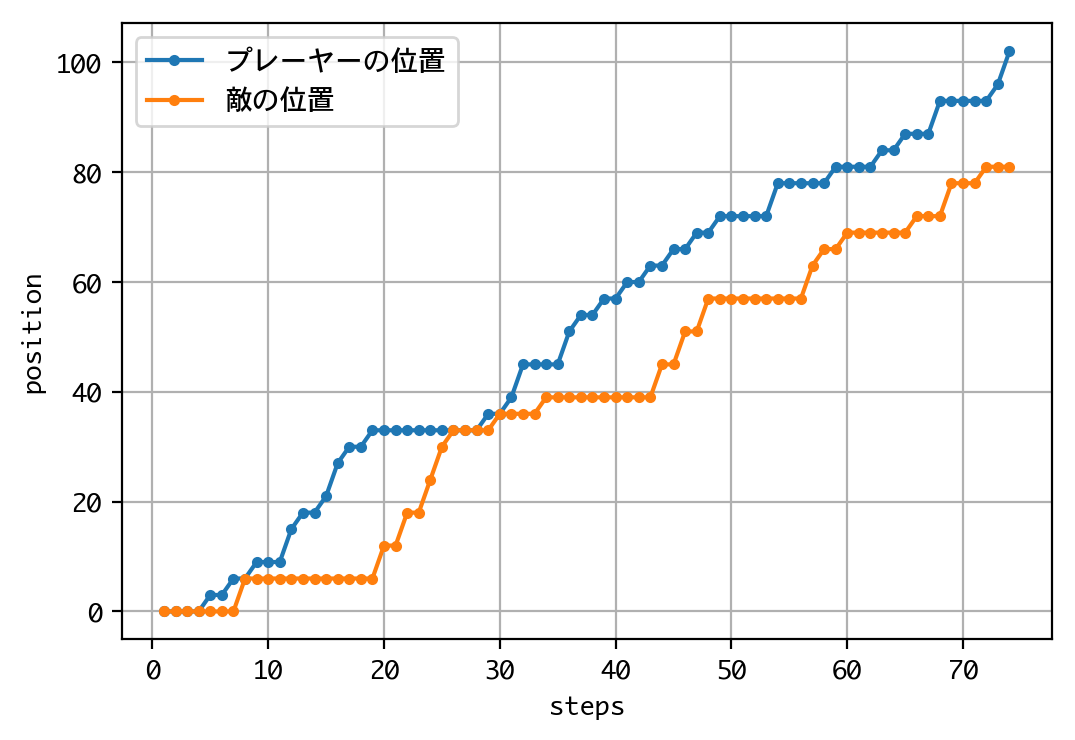

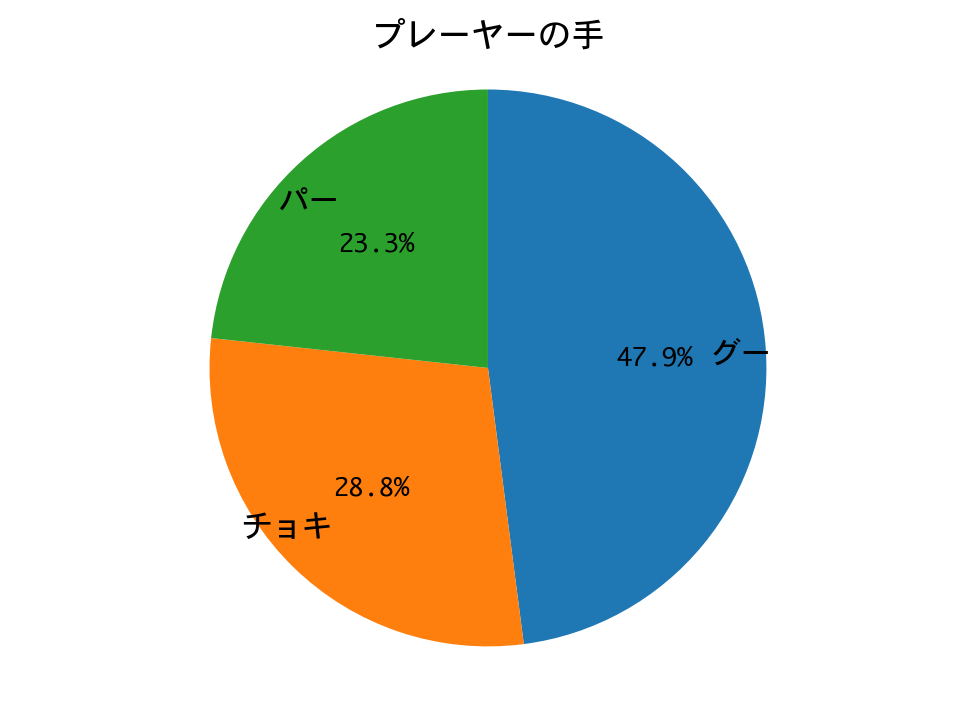

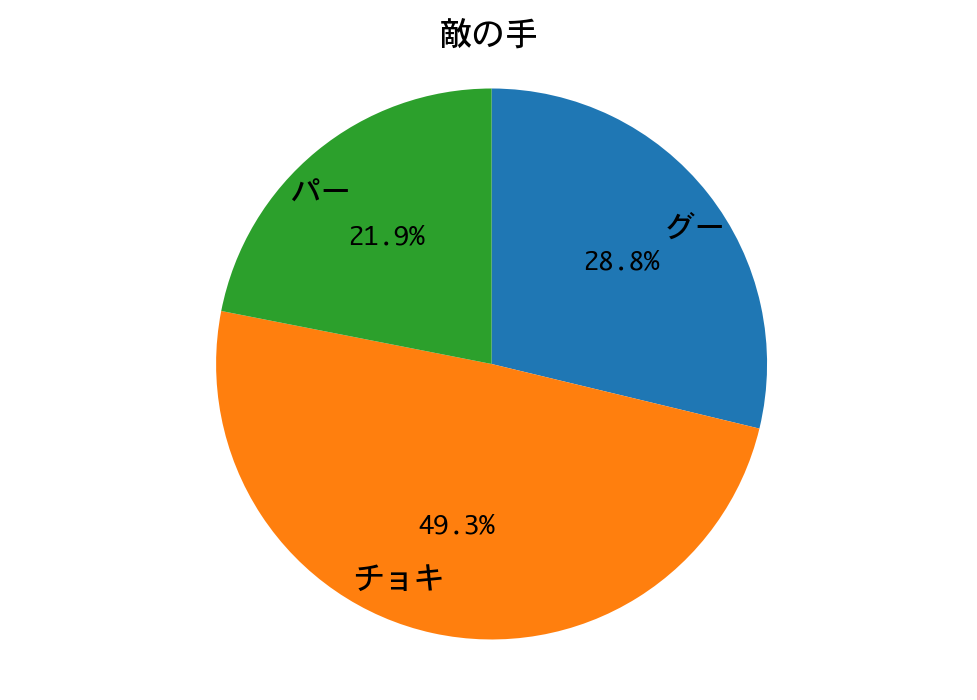

In [3]:
d = DQNJankenGlico(strategy=Strategy.MAJORITY, recycle=True)
h = d.test(nb_episodes=1, verbose=1, visualize=True)
visualize_positions(d.env)
visualize_hands(d.env)

結果は、それなりに食らいつきましたが、敗れてしまいました。

続いて1000戦して、勝率を見てみましょう。

モデルを作成します。
モデルを作成しました。
訓練済み重みを読み込みます。
訓練済み重みを読み込みました。
勝率(1000戦)：0.885


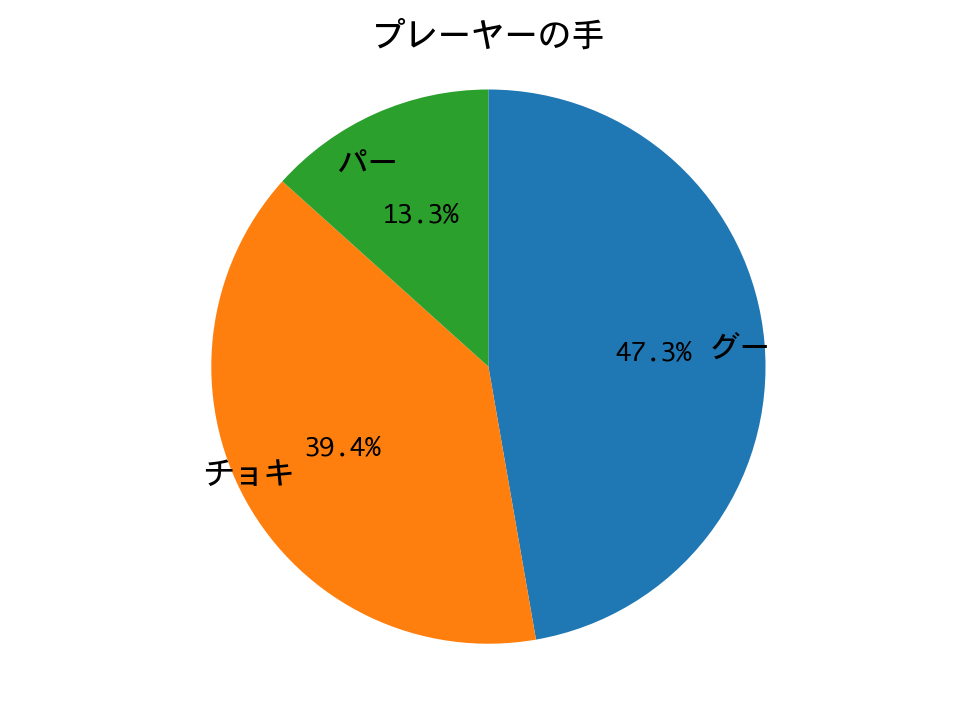

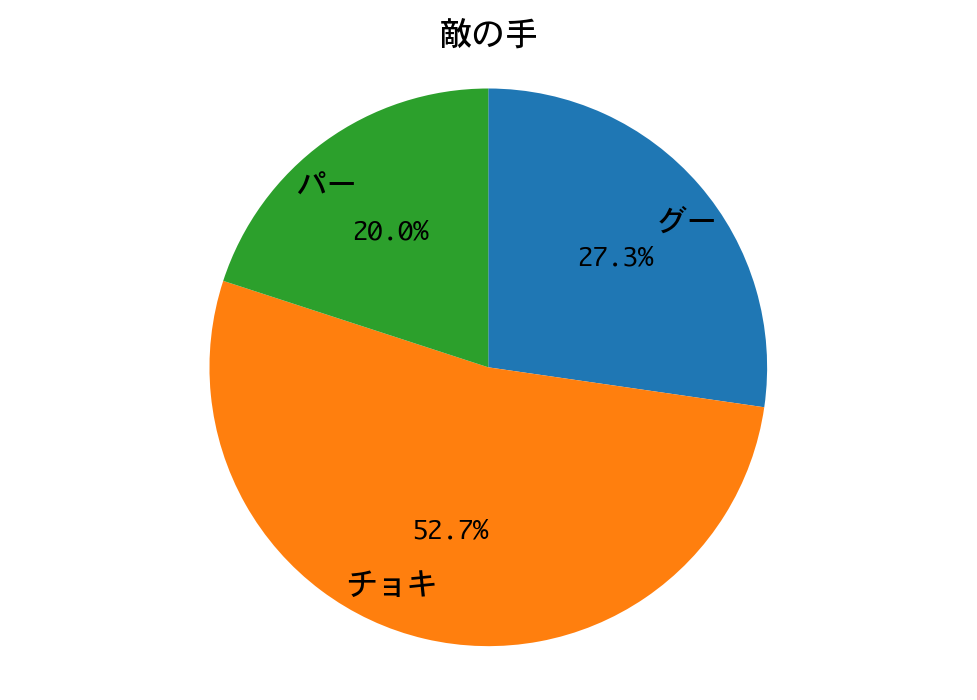

In [4]:
d = DQNJankenGlico(strategy=Strategy.MAJORITY, recycle=True)
h = d.test(nb_episodes=1000, visualize=False, verbose=0)

rwds = h.history['episode_reward']
win_rate = sum(rwd > 0 for rwd in rwds) / len(rwds)
print('勝率(1000戦)：' + str(win_rate))

visualize_hands(d.env)

最終戦、DQNの勝率は88.5%。グーにやられた印象です。DQNの手のおよそ半分をグーが占めるのは、多数決戦略側にチョキばかり出す人（＝期待値最大化戦略）がいるからでしょうか。

ここまで3位の成績です。

## 結果まとめ

|ラウンド|戦略|ひと勝負の結果|勝率（DQN）|DQNの作戦|
|:-:|:-:|:-:|:-:|:-:|
|一回戦|ランダム|DQNの勝ち|98.6%|期待値最大化|
|二回戦|人間|DQNの勝ち|99%|期待値最大化|
|三回戦|カボチャ|DQNの勝ち|100%|勝ちパターン化|
|四回戦|期待値最大化|DQNの勝ち|100%|勝ちパターン化|
|五回戦|ナッシュ均衡|**戦略側の勝ち**|45.3%|不明|
|六回戦|記憶|**戦略側の勝ち**|74.7%|不明|
|最終戦|多数決|DQNの勝ち|88.5%|不明|


## 結論

ナッシュ均衡最強！